# Matrix element LM plotting routines demo

28/11/19 v1, 07/02/20 updated Euler grouping, 

Source [notebook on Github](https://github.com/phockett/ePSproc/blob/master/epsproc/tests/ePSproc_demo_matE_plotting_Feb2020.ipynb).

## Basic IO

In [1]:
import sys
import os
import time
import numpy as np

# For module testing, include path to module here
modPath = r'D:\code\github\ePSproc'
# modPath = r'/home/femtolab/github/ePSproc/'
sys.path.append(modPath)
import epsproc as ep

* pyevtk not found, VTK export not available. 


In [2]:
# Load data from modPath\data
dataPath = os.path.join(modPath, 'data', 'photoionization')
dataFile = os.path.join(dataPath, 'n2_3sg_0.1-50.1eV_A2.inp.out')  # Set for sample N2 data for testing

# Scan data file
dataSet = ep.readMatEle(fileIn = dataFile)
dataXS = ep.readMatEle(fileIn = dataFile, recordType = 'CrossSection')  # XS info currently not set in NO2 sample file.

*** ePSproc readMatEle(): scanning files for DumpIdy segments.

*** Scanning file(s)
['D:\\code\\github\\ePSproc\\data\\photoionization\\n2_3sg_0.1-50.1eV_A2.inp.out']

*** Reading ePS output file:  D:\code\github\ePSproc\data\photoionization\n2_3sg_0.1-50.1eV_A2.inp.out
Expecting 51 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 102 DumpIdy segments.
Found 102 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 102 sets of DumpIdy file segments, (0 blank)
*** ePSproc readMatEle(): scanning files for CrossSection segments.

*** Scanning file(s)
['D:\\code\\github\\ePSproc\\data\\photoionization\\n2_3sg_0.1-50.1eV_A2.inp.out']

*** Reading ePS output file:  D:\code\github\ePSproc\data\photoionization\n2_3sg_0.1-50.1eV_A2.inp.out
Expecting 51 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 3 CrossSection segments.
Found 3 CrossSection segments (sets of results).
Processed 3 sets of Cro

In [3]:
jobInfo = ep.headerFileParse(dataFile)
molInfo = ep.molInfoParse(dataFile)

*** Job info from file header.

 ePS n2, batch n2_3sg_0.1-50.1eV, orbital A2
 N2 X-state (3sg-1)
 E=0.1:1.0:50.1 (51 points)
 Fri Nov 30 08:47:52 EST 2018

*** Found orbitals
1   1 Ene =     -15.6719 Spin =Alpha Occup =   2.000000
2   2 Ene =     -15.6676 Spin =Alpha Occup =   2.000000
3   3 Ene =      -1.4948 Spin =Alpha Occup =   2.000000
4   4 Ene =      -0.7687 Spin =Alpha Occup =   2.000000
5   5 Ene =      -0.6373 Spin =Alpha Occup =   2.000000
6   6 Ene =      -0.6283 Spin =Alpha Occup =   2.000000
7   7 Ene =      -0.6283 Spin =Alpha Occup =   2.000000

*** Found atoms
Z =  7 ZS =  7 r =   0.0000000000   0.0000000000   0.5328050000
Z =  7 ZS =  7 r =   0.0000000000   0.0000000000  -0.5328050000



*** Job summary data
 ePS n2, batch n2_3sg_0.1-50.1eV, orbital A2
 N2 X-state (3sg-1)
 E=0.1:1.0:50.1 (51 points)
 Fri Nov 30 08:47:52 EST 2018

Electronic structure input: '/home/paul/ePS_stuff/n2/electronic_structure/n2_cc-pVQZ_geom.molden'
Initial state occ:		 [2 2 2 2 2 4]
Final state occ:		 [2 2 2 2 1 4]
IPot (input vertical IP, eV):		 15.58

*** Additional orbital info (SymProd)
Ionizing orb:			 [0 0 0 0 1 0]
Ionizing orb sym:		 ['SG']
Orb energy (eV):		 [-17.34181631]
Orb energy (H):			 [-0.6373]
Orb energy (cm^-1):		 [-139871.18257579]
Threshold wavelength (nm):	 71.49435513338314

*** Molecular structure



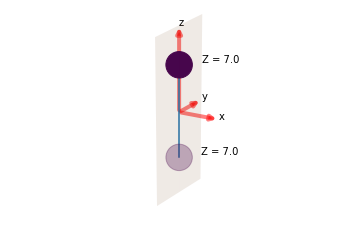

In [4]:
ep.jobSummary(jobInfo, molInfo);

## Basic plotting

As shown in the [basic demo notebook](https://epsproc.readthedocs.io/en/latest/ePSproc_demo_Aug2019/ePSproc_demo_Aug2019.html), basic plotting with Xarray functionality is a quick and easy way to plot matrix elements.

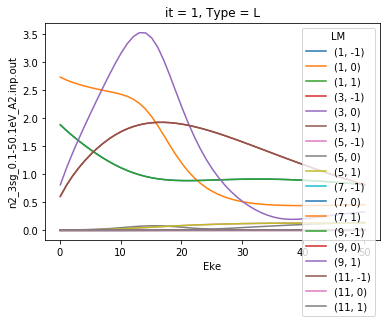

In [5]:
# Plot matrix elements using Xarray functionality
daPlot = dataSet[0].sum('mu').sum('Sym').sel({'Type':'L'}).squeeze()
daPlot.pipe(np.abs).plot.line(x='Eke');

For more control, additional preprocessing with thresholding & selection can be used.

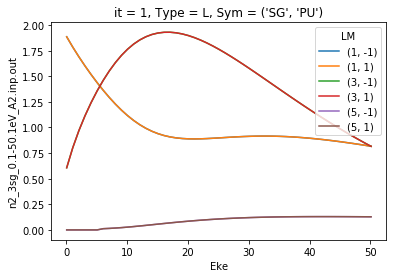

In [6]:
selDims = {'Type':'L','Cont':'PU'}
daPlot = ep.matEleSelector(dataSet[0], thres=1e-2, inds = selDims, sq = True)
daPlot.pipe(np.abs).sum('mu').plot.line(x='Eke');

... or faceting ...

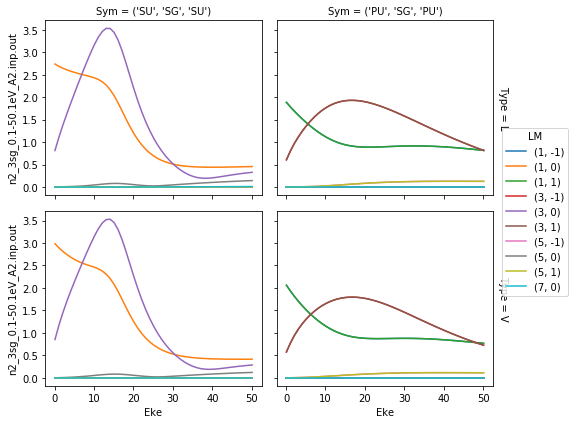

In [7]:
# Plot with faceting on symmetry
daPlot = ep.matEleSelector(dataSet[0], thres=1e-2, dims = 'Eke', sq = True).sum('mu').squeeze()
daPlot.pipe(np.abs).plot.line(x='Eke', col='Sym', row='Type');

## Plotting maps with lmPlot

For complex multidimensional cases line plots get busy, quickly.  A nice alternative is provided by [Seaborn's Clustermap](https://seaborn.pydata.org/examples/structured_heatmap.html), which produces a 2D map of values (i.e. a heatmap or image), with additional dimensional information as a side-bar.  This is now implemented in `ep.lmPlot()`.

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.01, with Seaborn


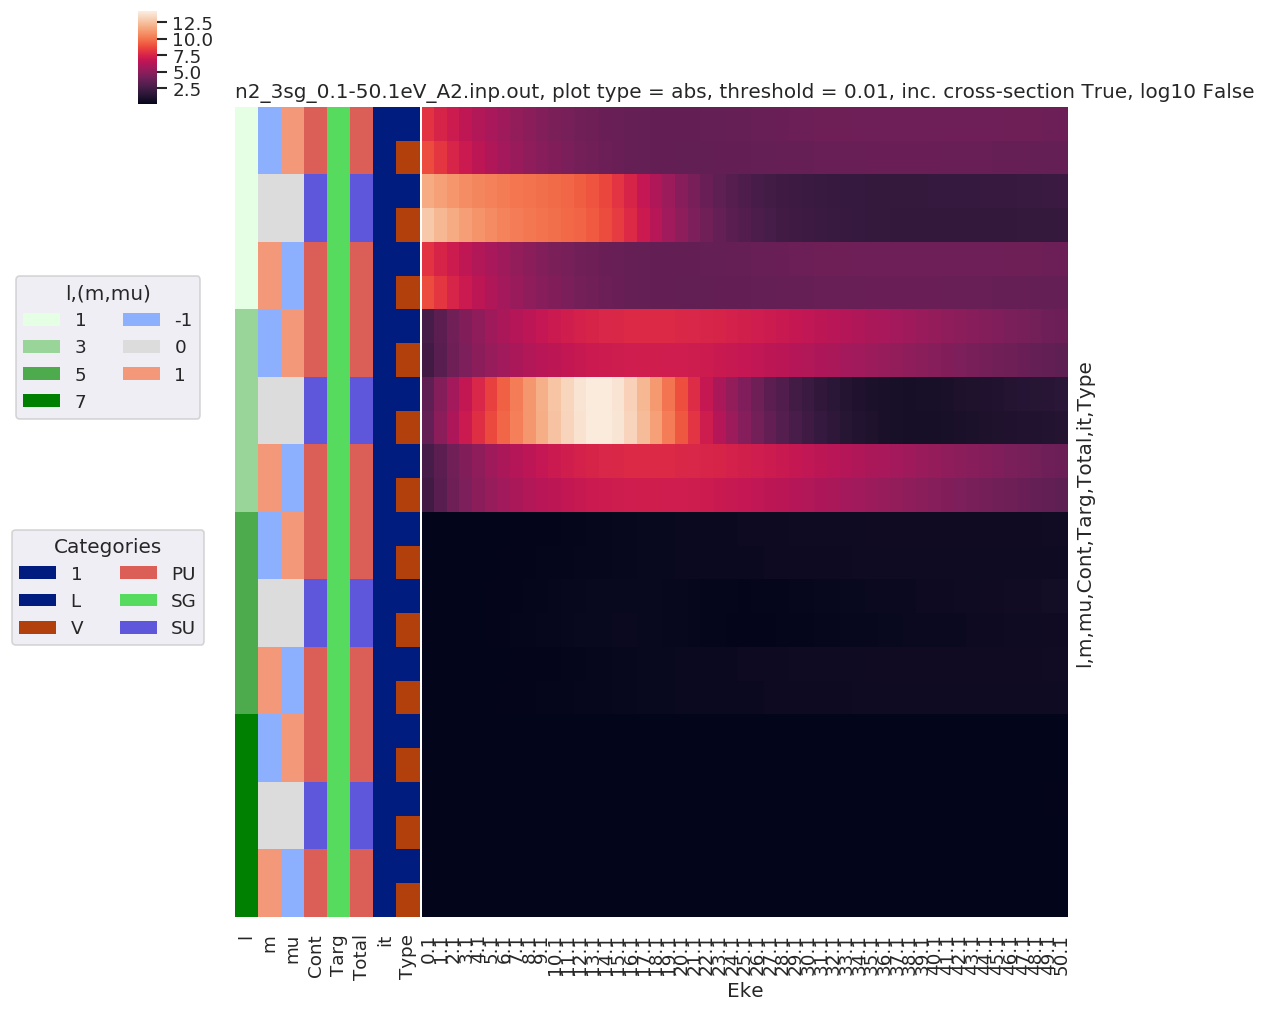

In [8]:
# Plot with sensible defaults - all dims
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0])

In order to use Seaborn, the data is converted from a multidimensional Xarray to a 2D Pandas array.  This displays nicely in Jupyter, so is also handy for inspecting values.

In [9]:
daPlotpd

Eke                                   0.1        1.1        2.1        3.1   \
l m  mu Cont Targ Total it Type                                               
1 -1  1 PU   SG   PU    1  L      8.143443   7.593716   7.103404   6.660060   
                           V      8.900023   8.224738   7.627702   7.095200   
   0  0 SU   SG   SU    1  L     11.823354  11.429458  11.111935  10.849149   
                           V     12.883046  12.311423  11.824577  11.410811   
   1 -1 PU   SG   PU    1  L      8.143443   7.593716   7.103404   6.660060   
                           V      8.900023   8.224738   7.627702   7.095200   
3 -1  1 PU   SG   PU    1  L      2.620714   3.416440   4.071325   4.629875   
                           V      2.484140   3.291182   3.949586   4.494447   
   0  0 SU   SG   SU    1  L      3.513428   4.719556   5.785863   6.766306   
                           V      3.682143   4.976274   6.086735   7.067816   
   1 -1 PU   SG   PU    1  L      2.620714   3.416440   4.071325   4.629875   
                           V      2.484140   3.291182   3.949586   4.494447   
5 -1  1 PU   SG   PU    1  L      0.003993   0.013835   0.021033   0.026999   
                           V      0.002819   0.010751   0.017869   0.026216   
   0  0 SU   SG   SU    1  L      0.006473   0.021244   0.032261   0.041993   
                           V      0.005091   0.017458   0.027707   0.039802   
   1 -1 PU   SG   PU    1  L      0.003993   0.013835   0.021033   0.026999   
                           V      0.002819   0.010751   0.017869   0.026216   
7 -1  1 PU   SG   PU    1  L      0.000024   0.000158   0.000305   0.000394   
                           V      0.000025   0.000150   0.000266   0.000318   
   0  0 SU   SG   SU    1  L      0.000020   0.000145   0.000292   0.000373   
                           V      0.000022   0.000137   0.000240   0.000265   
   1 -1 PU   SG   PU    1  L      0.000024   0.000158   0.000305   0.000394   
                           V      0.000025   0.000150   0.000266   0.000318   

Eke                                   4.1        5.1        6.1        7.1   \
l m  mu Cont Targ Total it Type                                               
1 -1  1 PU   SG   PU    1  L      6.255712   5.885550   5.546815   5.238038   
                           V      6.617558   6.187859   5.801034   5.453317   
   0  0 SU   SG   SU    1  L     10.627257  10.437825  10.275304  10.134910   
                           V     11.061133  10.768451  10.526367  10.328033   
   1 -1 PU   SG   PU    1  L      6.255712   5.885550   5.546815   5.238038   
                           V      6.617558   6.187859   5.801034   5.453317   
3 -1  1 PU   SG   PU    1  L      5.118714   5.553100   5.941282   6.287526   
                           V      4.953052   5.345025   5.683818   5.978440   
   0  0 SU   SG   SU    1  L      7.695465   8.593950   9.472654  10.335015   
                           V      7.963633   8.806609   9.618839  10.413320   
   1 -1 PU   SG   PU    1  L      5.118714   5.553100   5.941282   6.287526   
                           V      4.953052   5.345025   5.683818   5.978440   
5 -1  1 PU   SG   PU    1  L      0.033004   0.039974   0.048709   0.059861   
                           V      0.036675   0.049162   0.063460   0.079409   
   0  0 SU   SG   SU    1  L      0.052580   0.065454   0.081763   0.102433   
                           V      0.055471   0.074663   0.097135   0.122785   
   1 -1 PU   SG   PU    1  L      0.033004   0.039974   0.048709   0.059861   
                           V      0.036675   0.049162   0.063460   0.079409   
7 -1  1 PU   SG   PU    1  L      0.000405   0.000362   0.000320   0.000354   
                           V      0.000325   0.000356   0.000461   0.000630   
   0  0 SU   SG   SU    1  L      0.000355   0.000266   0.000224   0.000373   
                           V      0.000252   0.000340   0.000552   0.000822   
   1 -1 PU   SG   PU    1  L      0.000405   0.00

In [10]:
# With slicing by index (dims, energy)
daPlotpd.iloc[0:6, 0:6]

Eke                                    0.1        1.1        2.1        3.1  \
l m  mu Cont Targ Total it Type                                               
1 -1  1 PU   SG   PU    1  L      8.143443   7.593716   7.103404   6.660060   
                           V      8.900023   8.224738   7.627702   7.095200   
   0  0 SU   SG   SU    1  L     11.823354  11.429458  11.111935  10.849149   
                           V     12.883046  12.311423  11.824577  11.410811   
   1 -1 PU   SG   PU    1  L      8.143443   7.593716   7.103404   6.660060   
                           V      8.900023   8.224738   7.627702   7.095200   

Eke                                    4.1        5.1  
l m  mu Cont Targ Total it Type                        
1 -1  1 PU   SG   PU    1  L      6.255712   5.885550  
                           V      6.617558   6.187859  
   0  0 SU   SG   SU    1  L     10.627257  10.437825  
                           V     11.061133  10.768451  
   1 -1 PU   SG   PU    1  L      6.255712   5.885550  
                           V      6.617558   6.187859

### Examples...

Various settings can be passed for more control over the plot.

**Example with**
- Selection on Type = L
- Thresholding type by % of max value
- Log10 scaling
- Extended figure size


Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.08224737585639882, with Seaborn


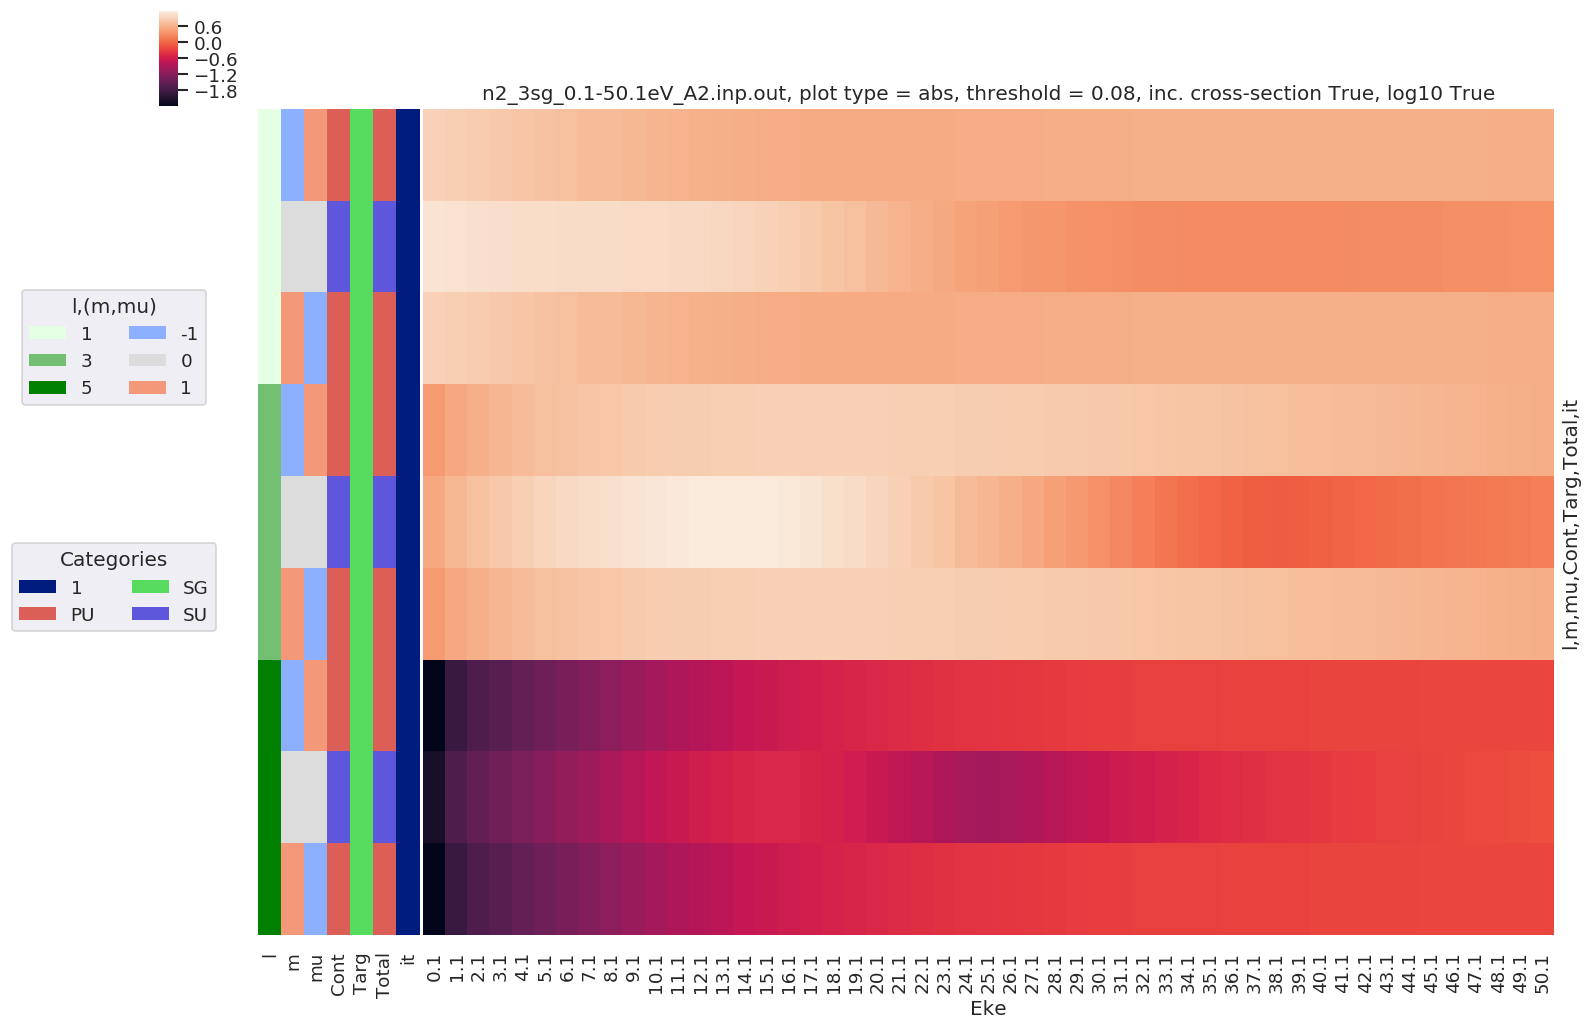

In [11]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, 
                                               plotDims = ('l','m','mu','Cont','Targ','Total','it'), 
                                               thresType='pc', thres = 0.01, figsize = (15,10), logFlag = True)

In [12]:
daPlot.unstack().stack(plotDim = ('l','m','mu','Cont','Targ','Total'))

<xarray.DataArray 'n2_3sg_0.1-50.1eV_A2.inp.out' (Eke: 51, it: 1, plotDim: 108)>
array([[[nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan]]])
Coordinates:
  * it       (it) int64 1
    Type     <U1 'L'
  * Eke      (Eke) float64 0.1 1.1 2.1 3.1 4.1 5.1 ... 46.1 47.1 48.1 49.1 50.1
    Ehv      (Eke) float64 15.68 16.68 17.68 18.68 ... 62.68 63.68 64.68 65.68
    SF       (Eke) complex128 (2.1560627+3.741674j) ... (4.4127053+1.8281945j)
  * plotDim  (plotDim) MultiIndex
  - l        (plotDim) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 5 5 5 5 5 5 5 5 5 5 5 5
  - m        (plotDim) int64 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ... 1 1 1 1 1 1 1 1 1
  - mu       (plotDim) int64 -1 -1 -1 -1 0 0 0 0 1 1 1 ... -1 -1 0 0 0 0 1 1 1 1
  - Cont     (plotDim) object 'PU' 'PU' 'SU' 'SU' 'PU' ... 'PU' 'PU' 'SU' 'SU'
  - Targ     (plotDim) object 'SG' 'SG' 'SG' 'SG' 'SG' ... 'SG' 'SG' 'SG' 'SG'
  - Total    (plotDim) ob

---
**Example with**
- Selection on Type = L
- Sum over mu
- Thresholding type by % of max value
- Log10 scaling
- Extended figure size


Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.08224737585639882, with Seaborn


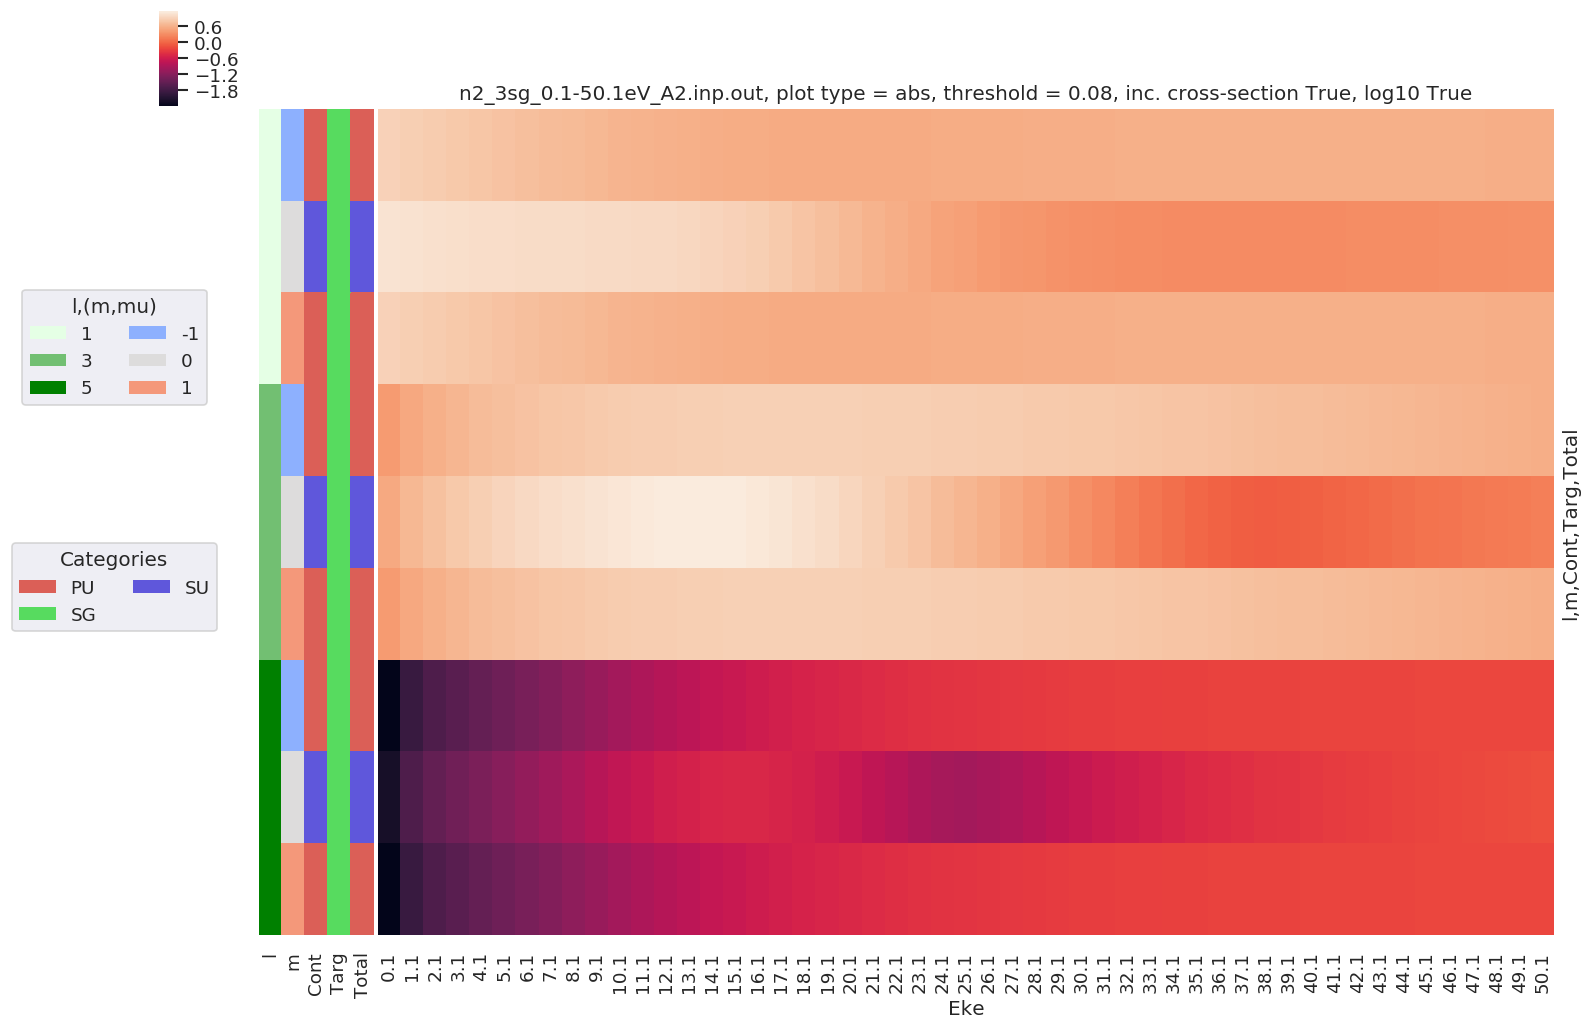

In [13]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, sumDims = ['mu'],
                                               plotDims = ('l','m','Cont','Targ','Total'), 
                                               thresType='pc', thres = 0.01, figsize = (15,10), logFlag = True)

---
**Example with**
- Selection on Type = L
- Sum over mu and Sym
- Thresholding type by % of max value
- Log10 scaling
- Extended figure size


Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.08224737585639882, with Seaborn


No handles with labels found to put in legend.


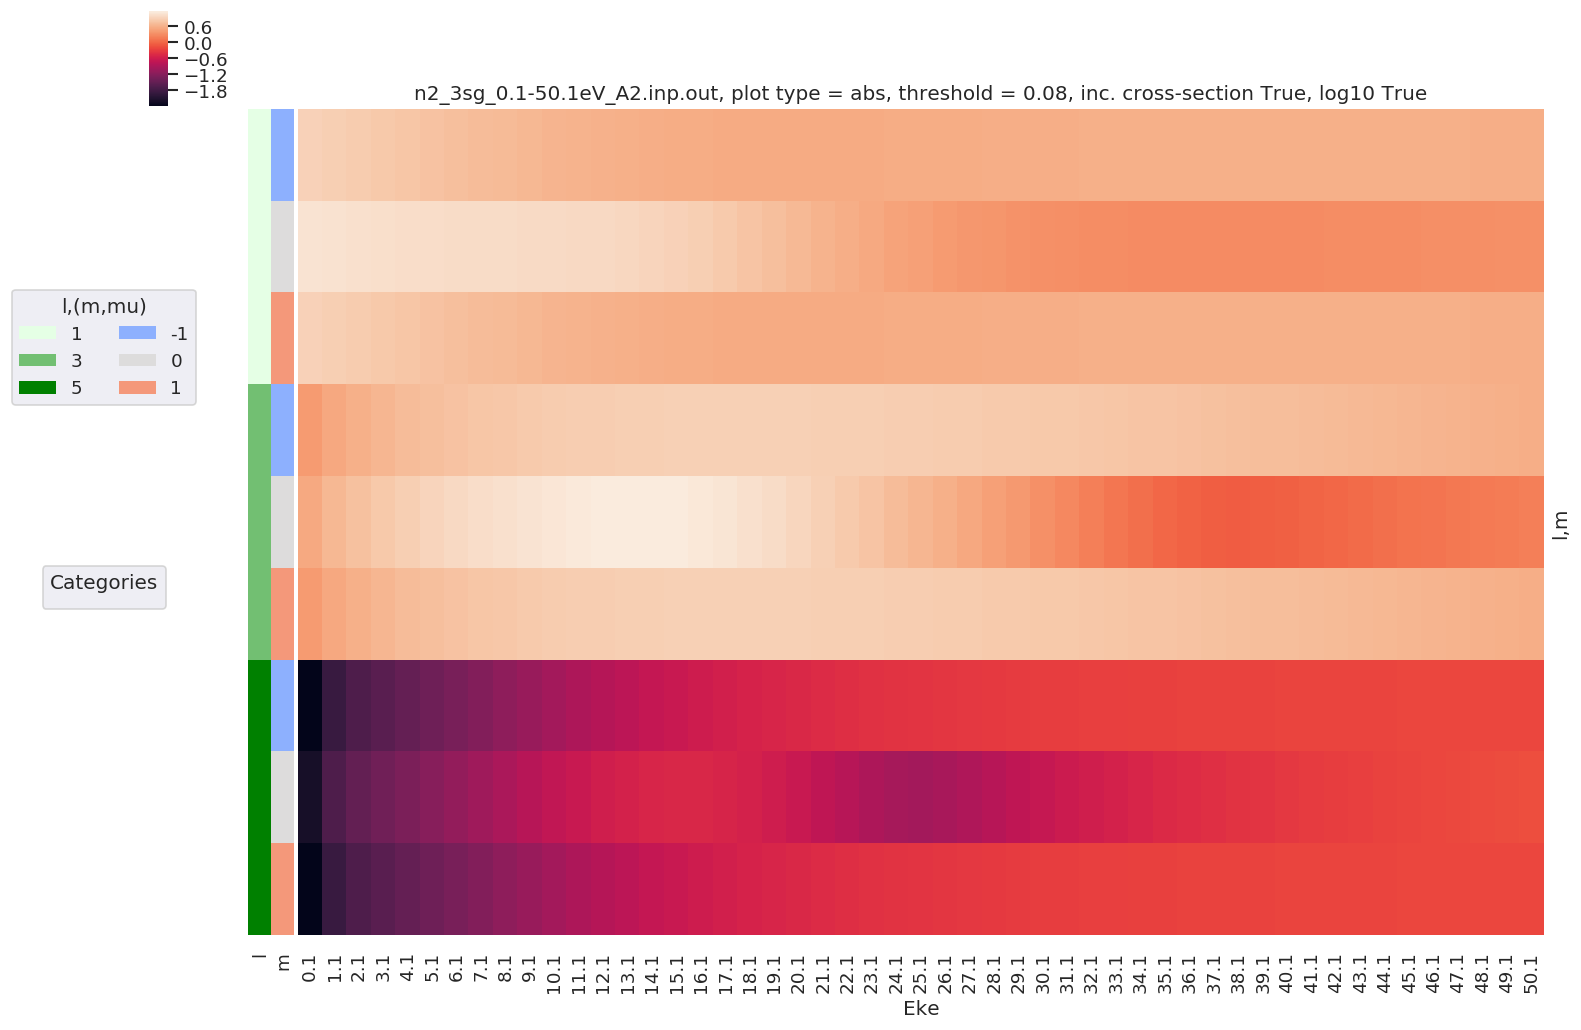

In [14]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, sumDims = ['mu', 'Sym'],
                                               plotDims = ('l','m'), 
                                               thresType='pc', thres = 0.01, figsize = (15,10), logFlag = True)

---
**Example with**
- Changing the ordering of plotDims, here with 'm' as the main index.

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.08224737585639882, with Seaborn


No handles with labels found to put in legend.


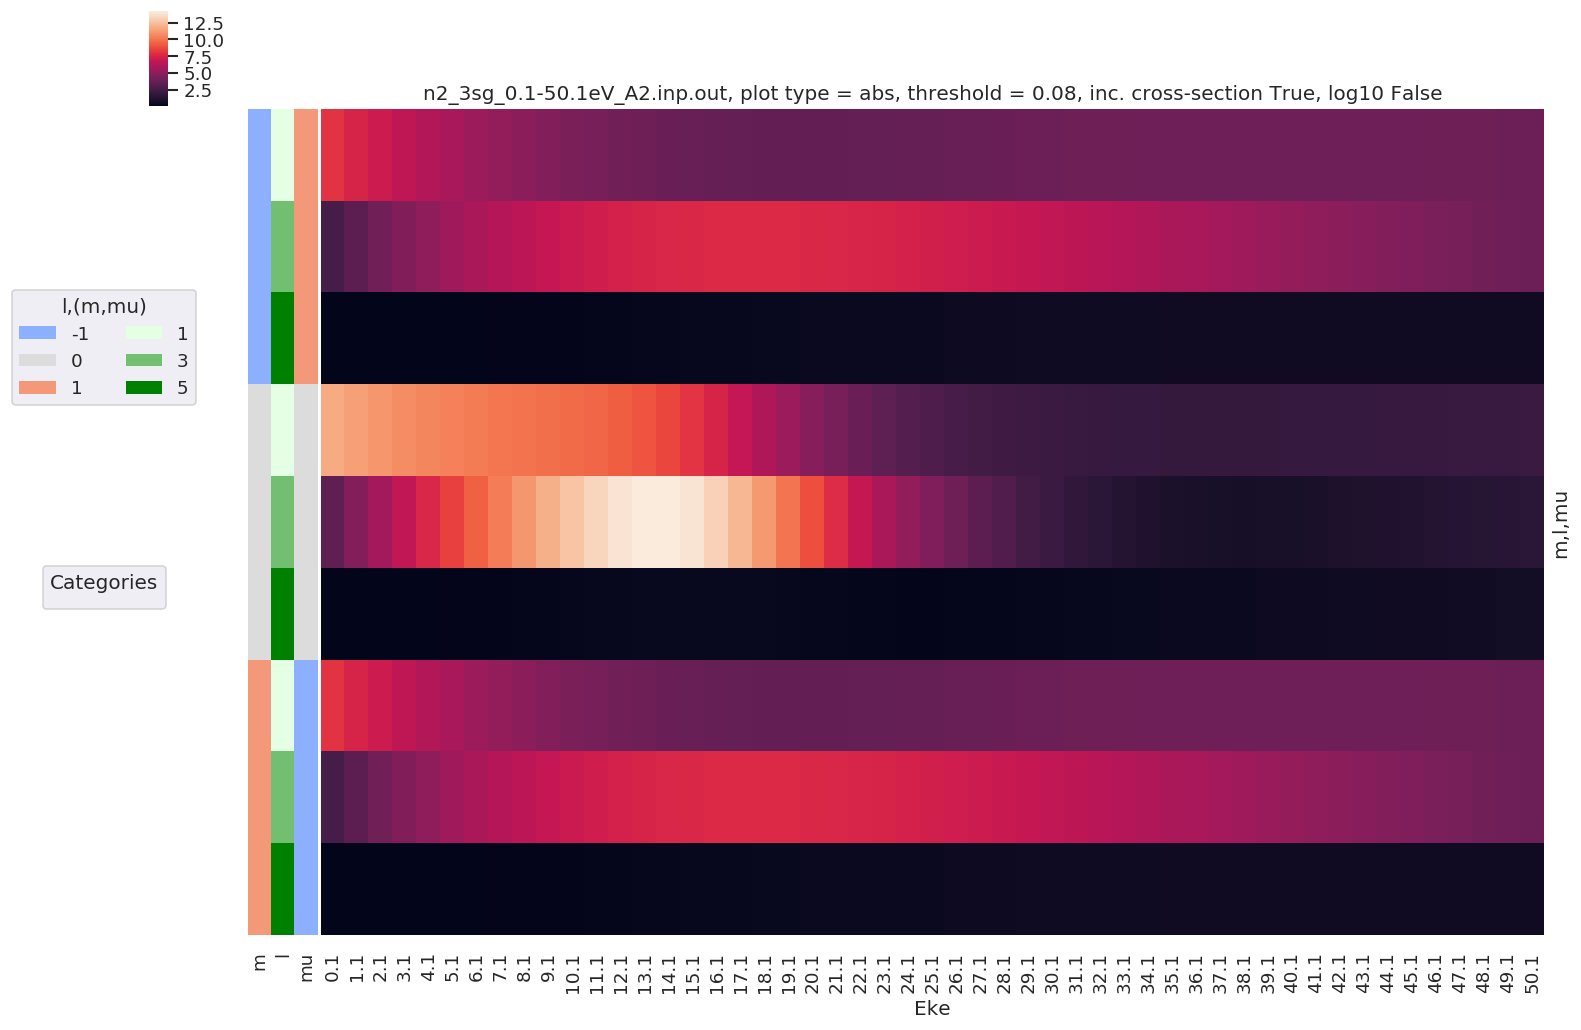

In [15]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, sumDims = ['Sym'],
                                               plotDims = ('m','l','mu'), 
                                               thresType='pc', thres = 0.01, figsize = (15,10))

---
**Example with**
- Ordering by symmetry group.

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.08224737585639882, with Seaborn


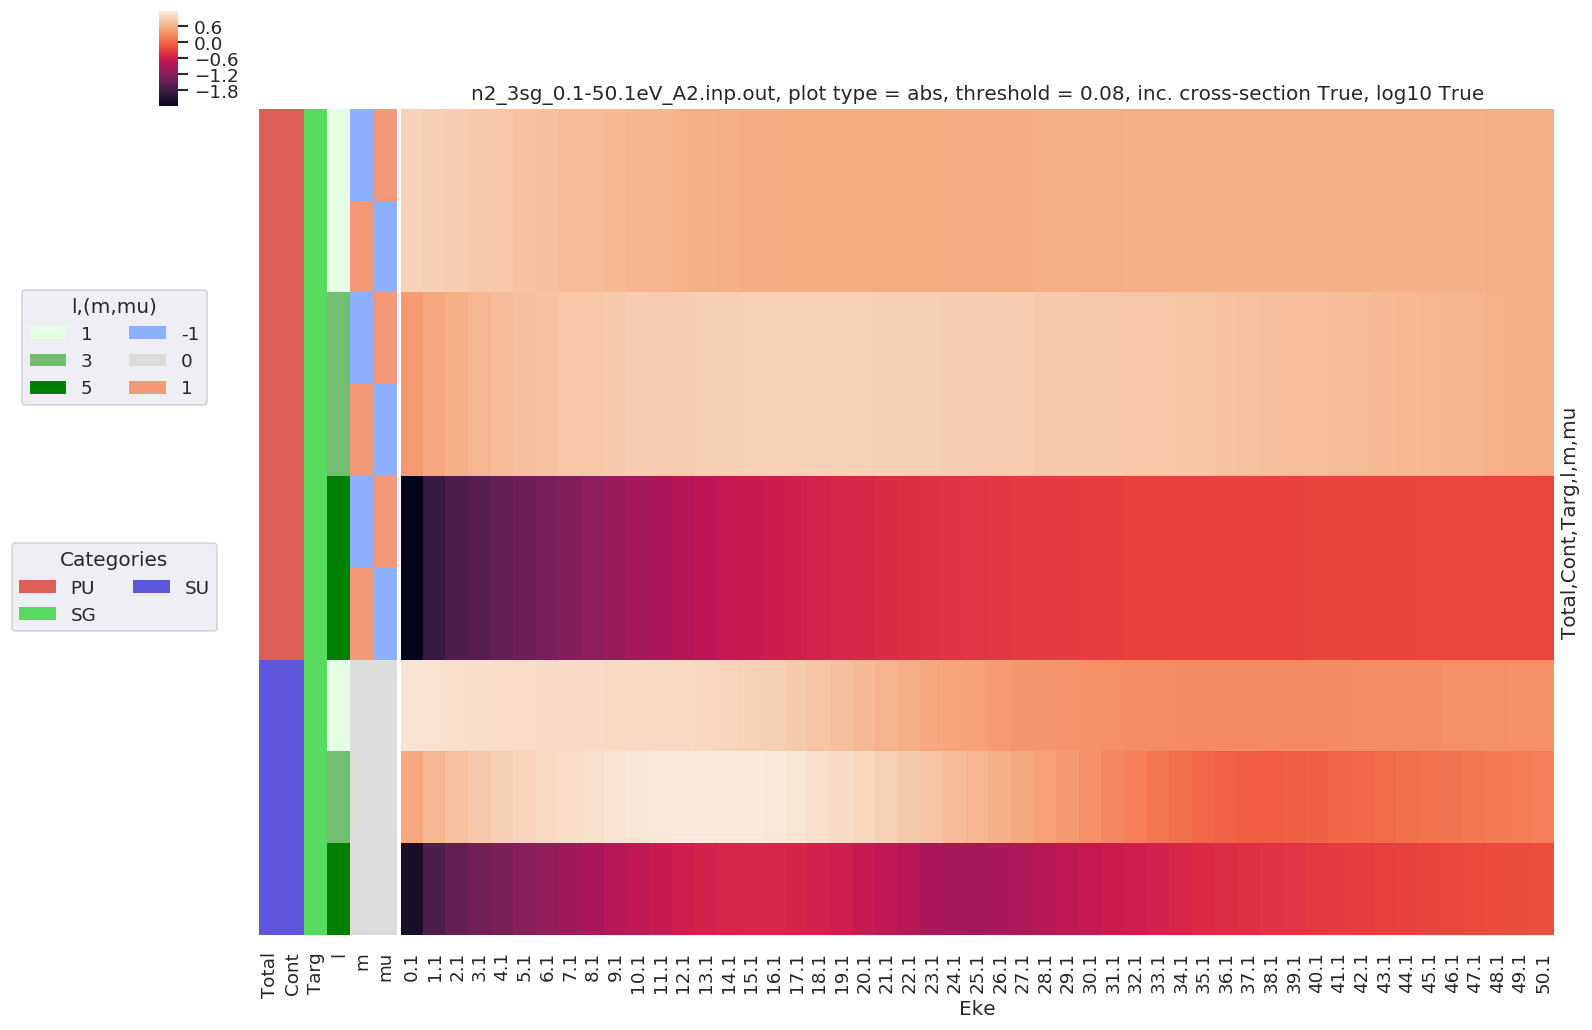

In [16]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'},
                                               plotDims = ('Total','Cont','Targ','l','m','mu'), 
                                               thresType='pc', thres = 0.01, figsize = (15,10), logFlag = True)

---
**Example with**
- Unwrapped phase plot

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev\lib\site-packages\numpy\lib\function_base.py:1519: RuntimeWarning:

invalid value encountered in remainder

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev\lib\site-packages\numpy\lib\function_base.py:1520: RuntimeWarning:

invalid value encountered in greater

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev\lib\site-packages\numpy\lib\function_base.py:1522: RuntimeWarning:

invalid value encountered in less



Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=phaseUW, thres=0.5, with Seaborn


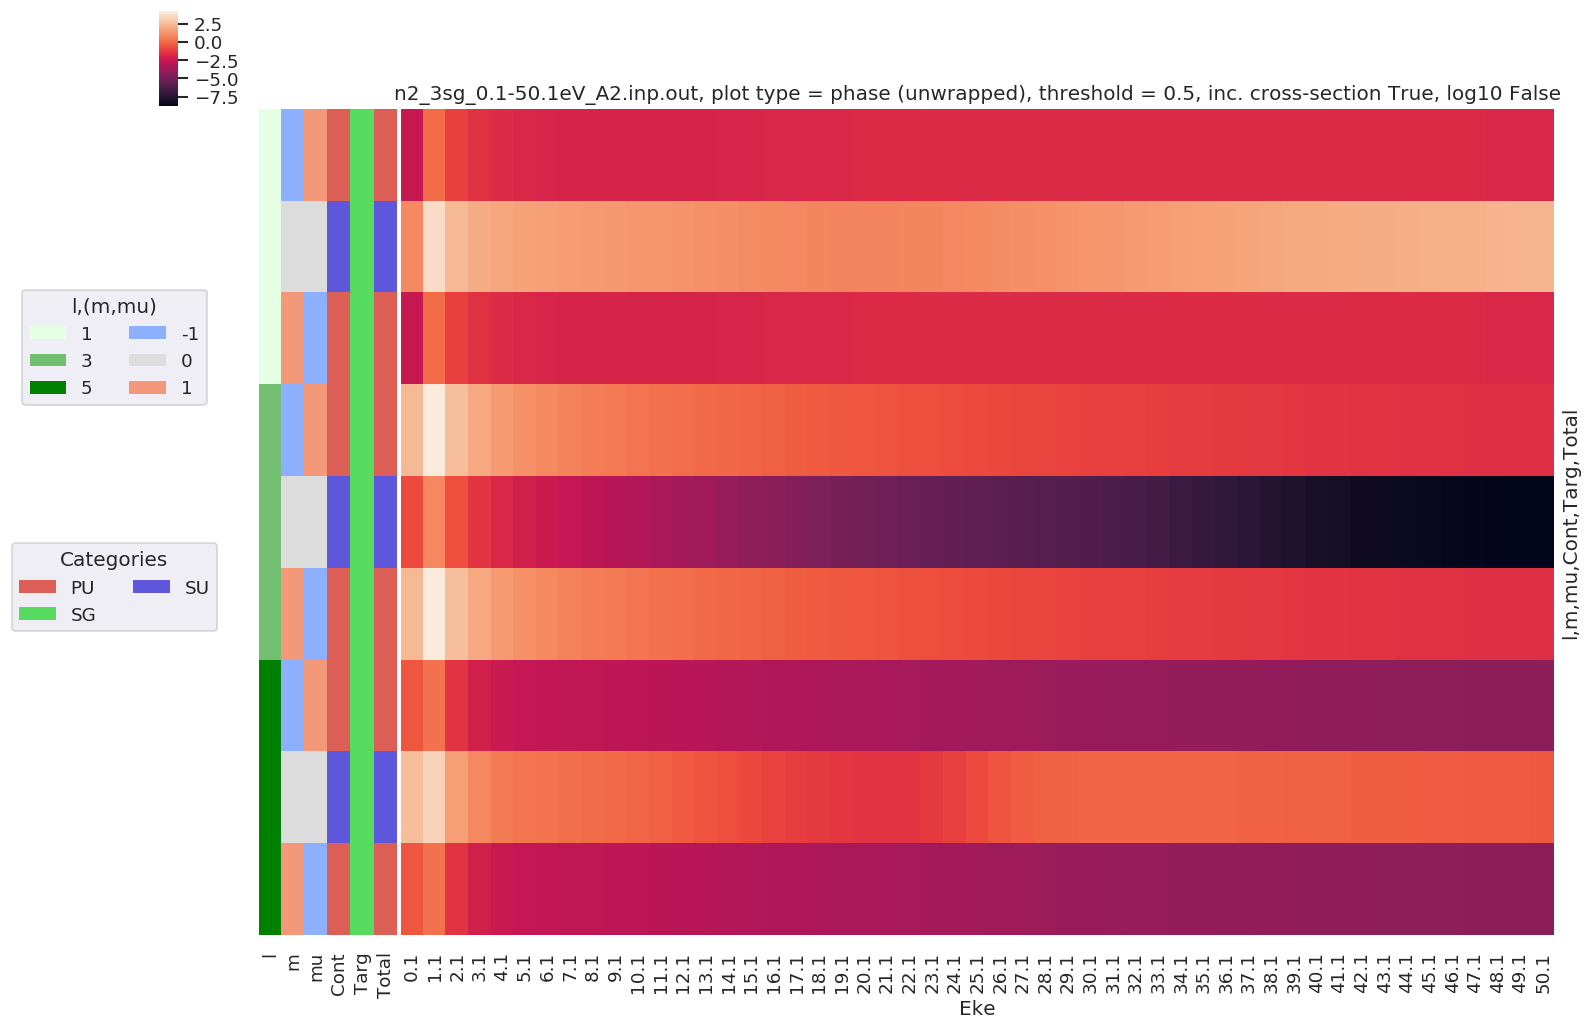

In [17]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, 
                                               plotDims = ('l','m','mu','Cont','Targ','Total'), 
                                               thres = 0.5, figsize = (15,10), 
                                               pType = 'phaseUW')

## Further analysis examples

### Summations
- Sum over Eke, plot by l.

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.08224737585639882, with Seaborn


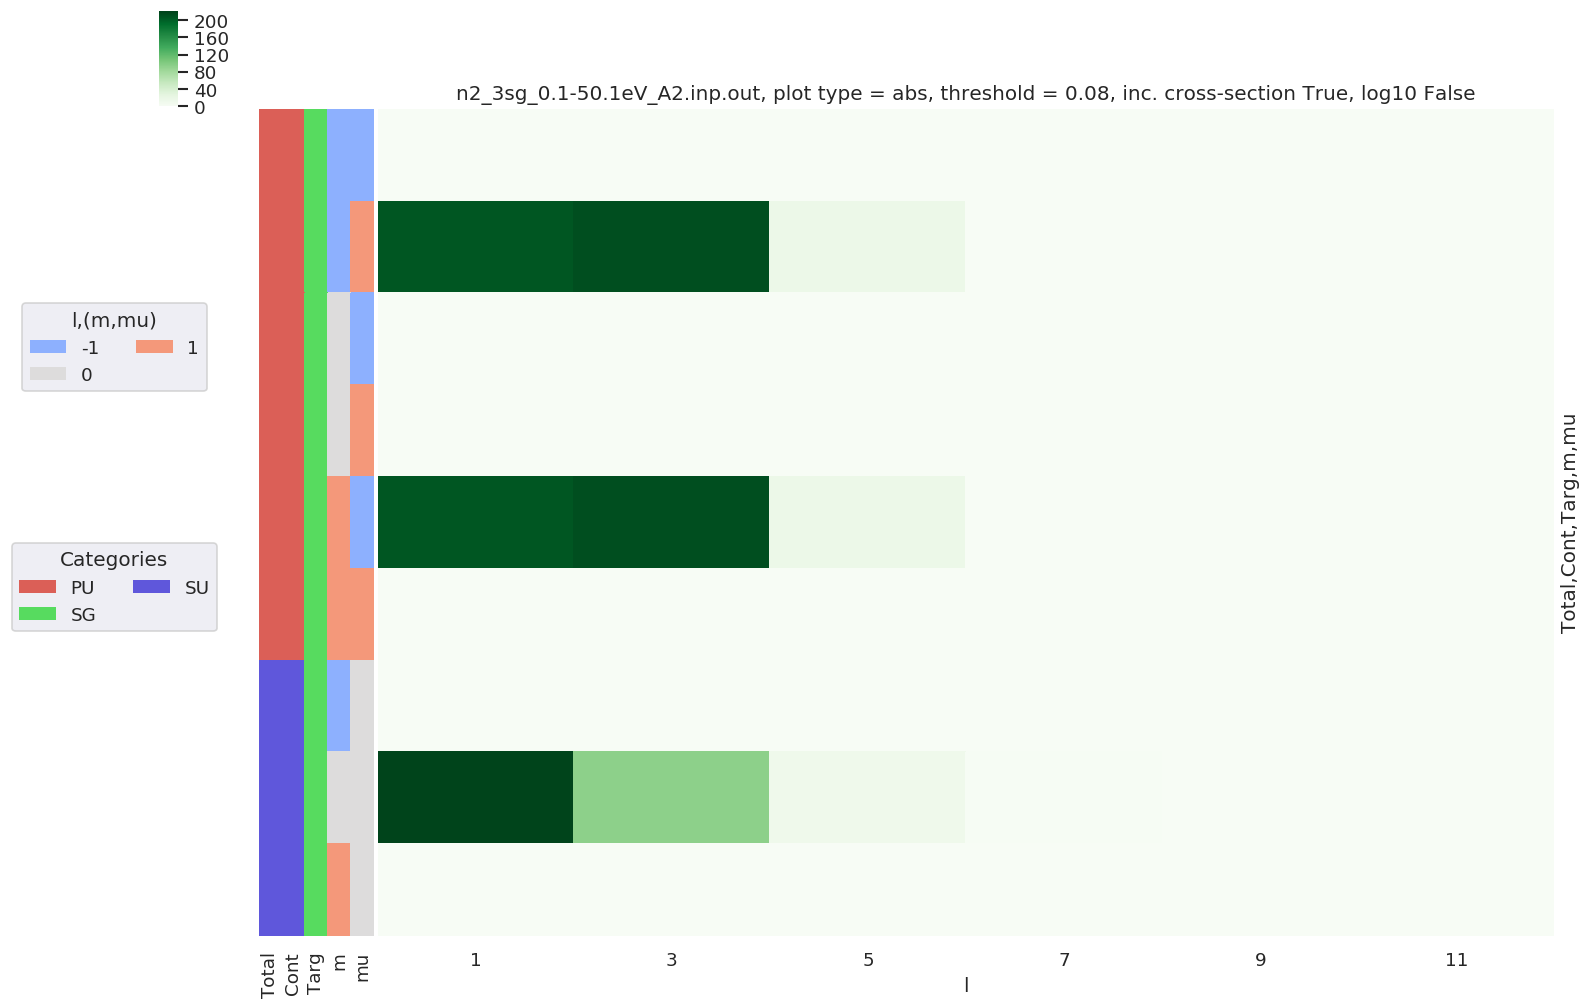

In [18]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, xDim = 'LM', sumDims = 'Eke',
                                               plotDims = ('Total','Cont','Targ','m','mu'), 
                                               thresType='pc', thres = 0.01, figsize = (15,10),
                                               cmap = 'Greens')

In [19]:
daPlotpd

l                              1           3          5         7         9   \
Total Cont Targ m  mu                                                          
PU    PU   SG   -1 -1    0.000000    0.000000   0.000000  0.000000  0.000000   
                    1  207.905550  212.622228  17.570951  0.779478  0.020871   
                 0 -1    0.000000    0.000000   0.000000  0.000000  0.000000   
                    1    0.000000    0.000000   0.000000  0.000000  0.000000   
                 1 -1  207.905550  212.622228  17.570951  0.779478  0.020871   
                    1    0.000000    0.000000   0.000000  0.000000  0.000000   
SU    SU   SG   -1  0    0.000000    0.000000   0.000000  0.000000  0.000000   
                 0  0  220.297545   95.032282  13.737638  0.950270  0.026699   
                 1  0    0.000000    0.000000   0.000000  0.000000  0.000000   

l                            11  
Total Cont Targ m  mu            
PU    PU   SG   -1 -1  0.000000  
                    1  0.000572  
                 0 -1  0.000000  
                    1  0.000000  
                 1 -1  0.000572  
                    1  0.000000  
SU    SU   SG   -1  0  0.000000  
                 0  0  0.000313  
                 1  0  0.000000

### Correlations
- Correlation plots from the Pandas representation with [`pandas.corr()`](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#correlation). This defaults to a Pearson correlation coefficient, but other types of correlation functions can be used. *Work in progress!*

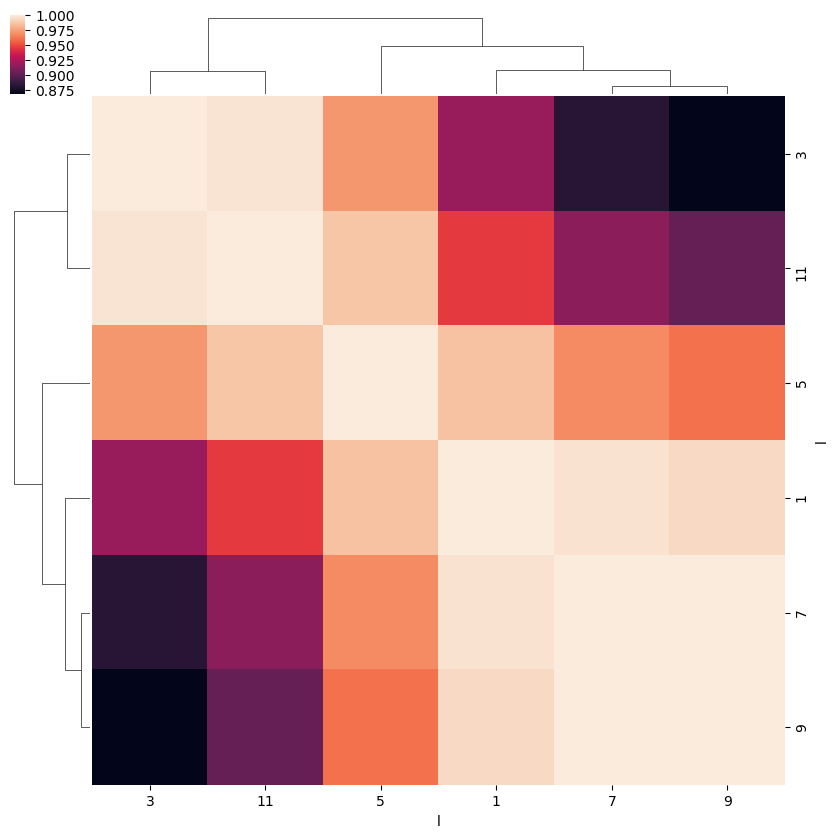

In [20]:
ep.snsMatMod.clustermap(daPlotpd.corr())

---
- Sum over symetries, plot by Eke.

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.08224737585639882, with Seaborn


No handles with labels found to put in legend.


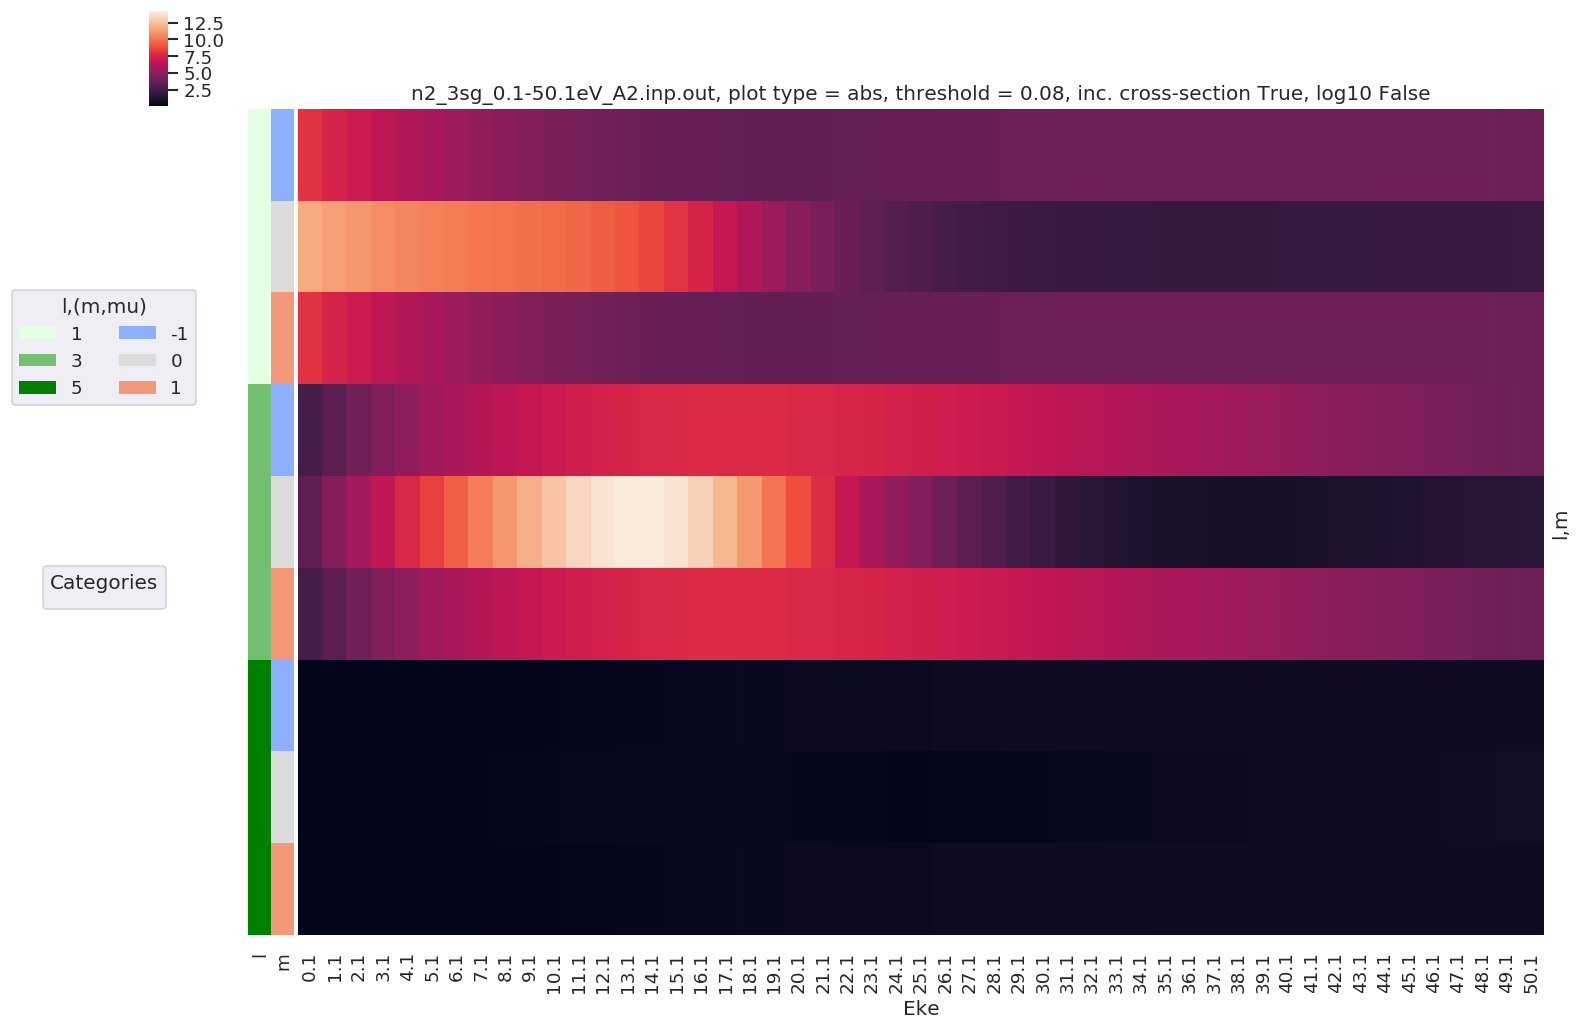

In [21]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, sumDims = ['mu', 'Sym'],
                                               plotDims = ('l','m'), 
                                               thresType='pc', thres = 0.01, figsize = (15,10))

In [22]:
# Display values for first 10 Ekes
daPlotpd.iloc[:,0:11]

Eke        0.1        1.1        2.1        3.1        4.1        5.1   \
l m                                                                      
1 -1   8.143443   7.593716   7.103404   6.660060   6.255712   5.885550   
   0  11.823354  11.429458  11.111935  10.849149  10.627257  10.437825   
   1   8.143443   7.593716   7.103404   6.660060   6.255712   5.885550   
3 -1   2.620714   3.416440   4.071325   4.629875   5.118714   5.553100   
   0   3.513428   4.719556   5.785863   6.766306   7.695465   8.593950   
   1   2.620714   3.416440   4.071325   4.629875   5.118714   5.553100   
5 -1   0.003993   0.013835   0.021033   0.026999   0.033004   0.039974   
   0   0.006473   0.021244   0.032261   0.041993   0.052580   0.065454   
   1   0.003993   0.013835   0.021033   0.026999   0.033004   0.039974   

Eke        6.1        7.1        8.1        9.1        10.1  
l m                                                          
1 -1   5.546815   5.238038   4.958515   4.707928   4.486077  
   0  10.275304  10.134910  10.010680   9.893534   9.769350  
   1   5.546815   5.238038   4.958515   4.707928   4.486077  
3 -1   5.941282   6.287526   6.594077   6.862346   7.093572  
   0   9.472654  10.335015  11.177359  11.987428  12.741400  
   1   5.941282   6.287526   6.594077   6.862346   7.093572  
5 -1   0.048709   0.059861   0.073792   0.090524   0.109801  
   0   0.081763   0.102433   0.127951   0.158158   0.192134  
   1   0.048709   0.059861   0.073792   0.090524   0.109801

---
- Correlations...

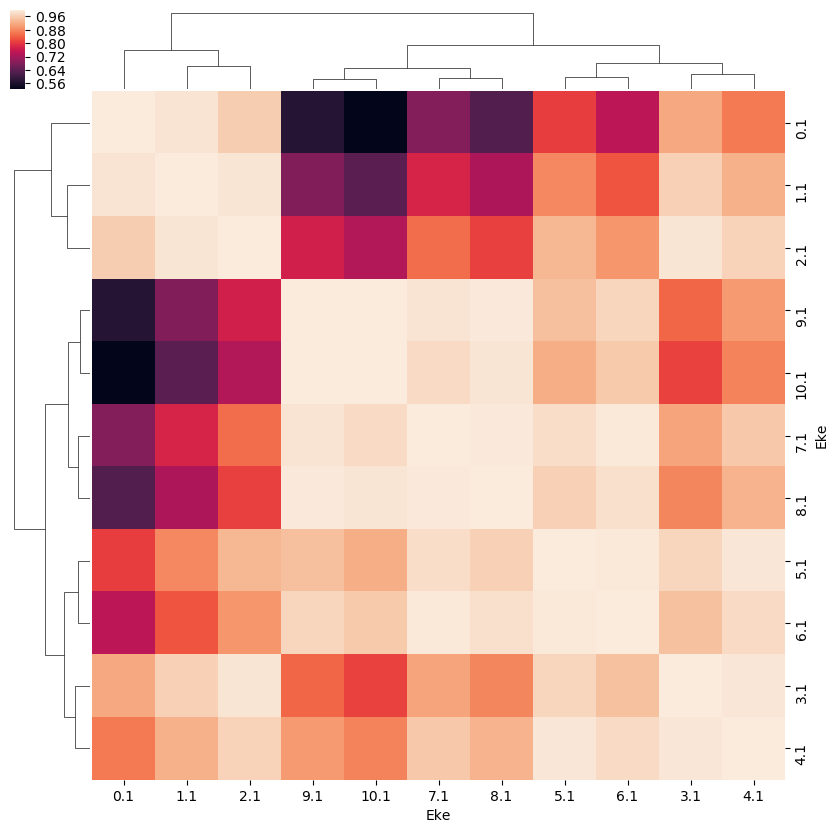

In [23]:
# Eke correlations
ep.snsMatMod.clustermap(daPlotpd.iloc[:,0:11].corr())

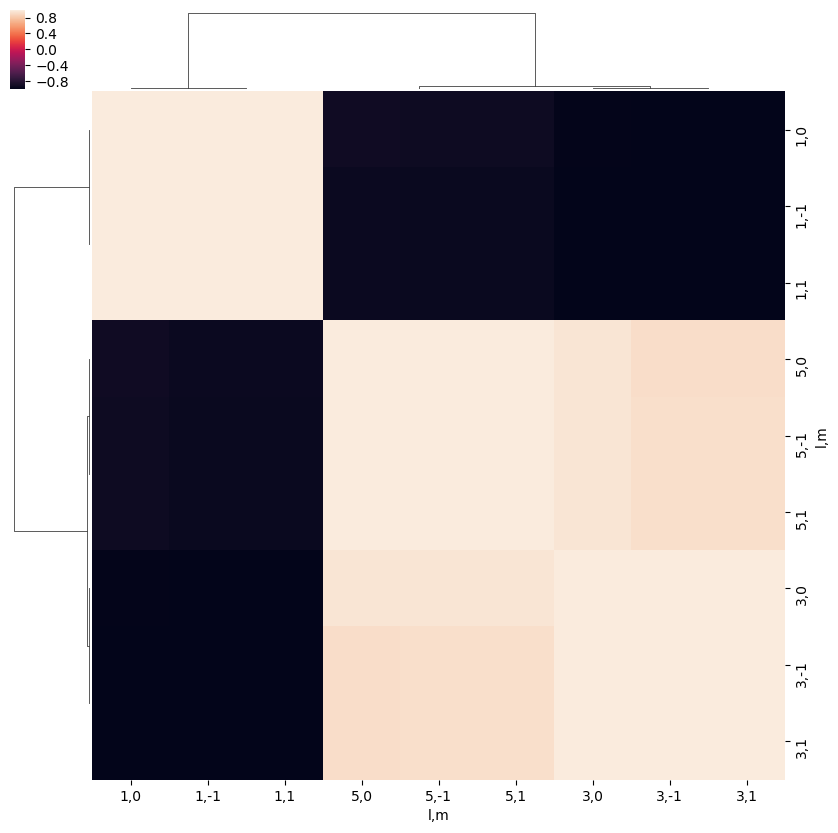

In [24]:
# (l,m) correlations
ep.snsMatMod.clustermap(daPlotpd.iloc[:,0:11].T.corr())

### Phase correlations
- Full phases and correlations...

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=phase, thres=0.5, with Seaborn


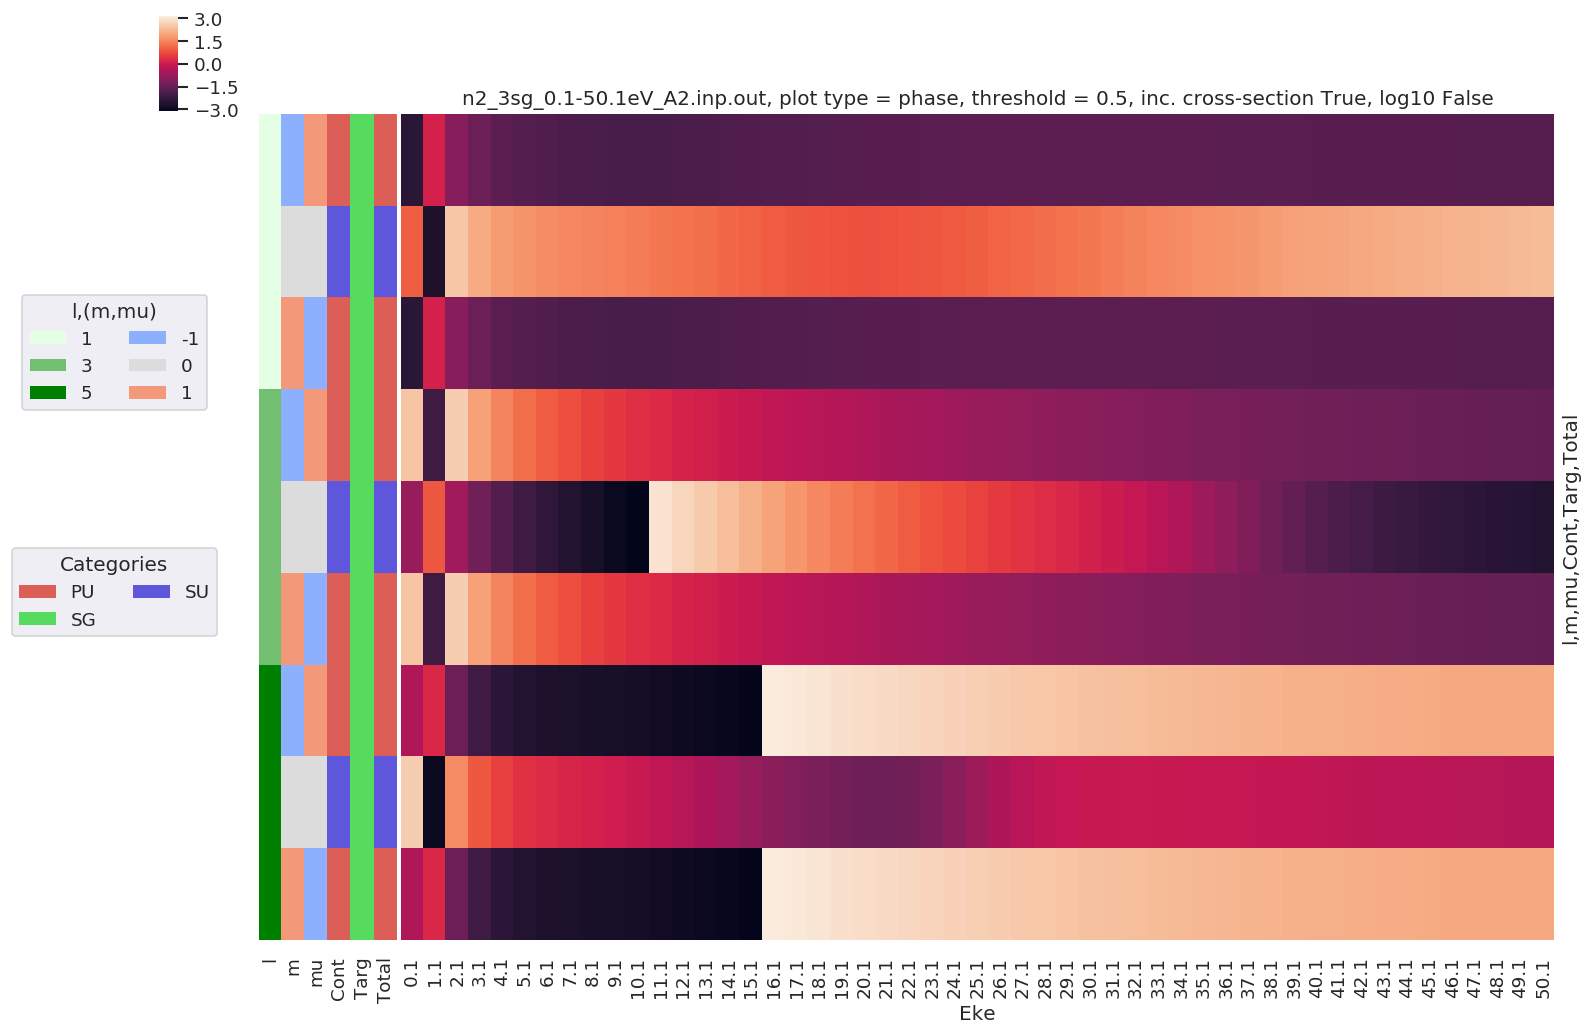

In [25]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, 
                                               plotDims = ('l','m','mu','Cont','Targ','Total'), 
                                               thres = 0.5, figsize = (15,10), 
                                               pType = 'phase')

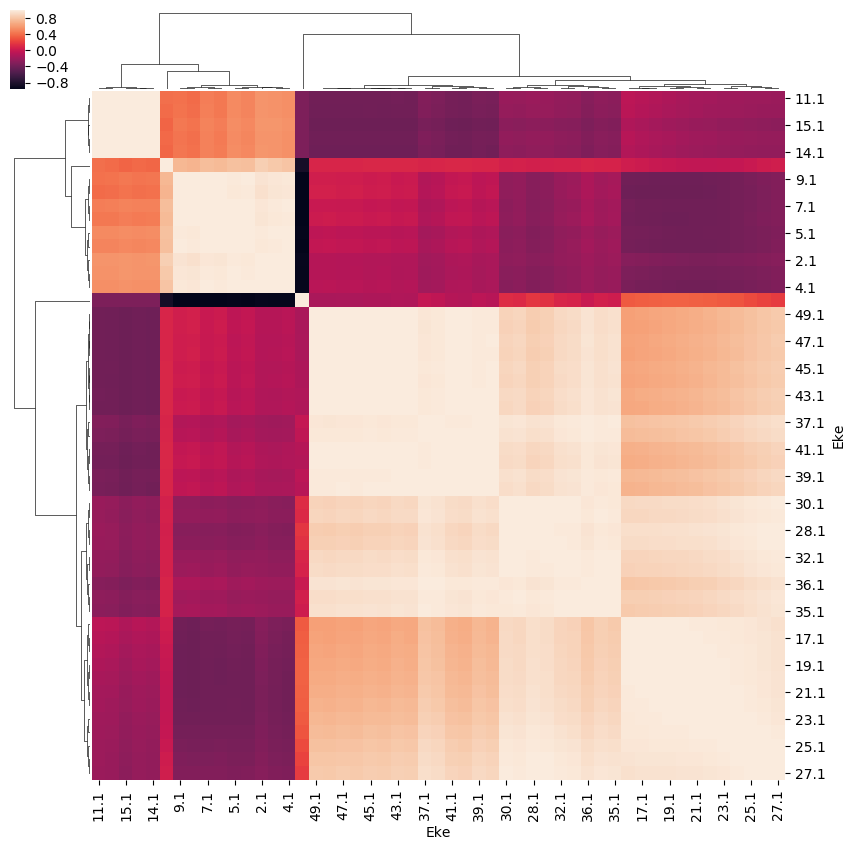

In [26]:
# ep.snsMatMod.clustermap(daPlotpd.iloc[:,0:11].corr())
ep.snsMatMod.clustermap(daPlotpd.corr())

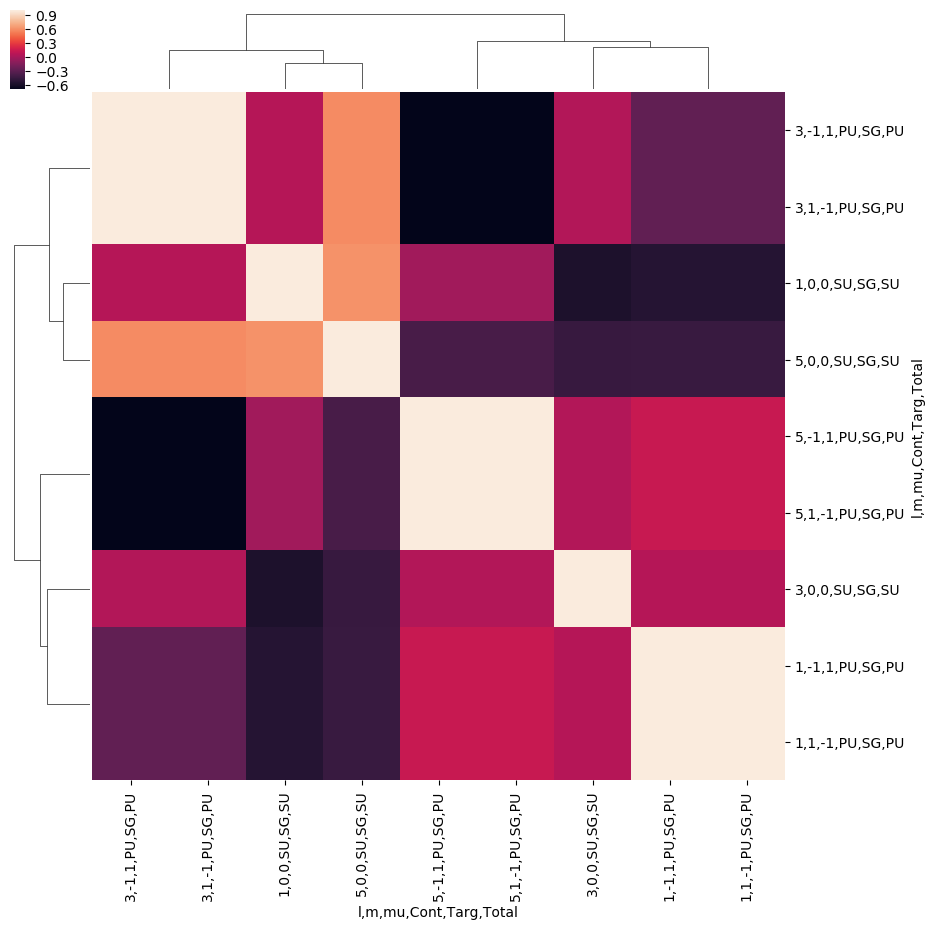

In [27]:
# ep.snsMatMod.clustermap(daPlotpd.iloc[:,0:11].T.corr())
ep.snsMatMod.clustermap(daPlotpd.T.corr())

## For $\beta_{L,M}$

The same functionality can be applied to plotting $\beta_{L,M}$ paramters... 

(For calculation details, see [$\beta_{L,M}$ calculations demo notebook](https://github.com/phockett/ePSproc/blob/master/epsproc/tests/ePSproc_BLM_calc_demo_Sept2019.ipynb).)

In [28]:
daIn = dataSet[0].copy()
BLMXeN2 = ep.mfblm(daIn, selDims = {'Type':'L'}, thres = 1e-2, verbose = 0)   # Run for all Eke

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.01, with Seaborn


No handles with labels found to put in legend.


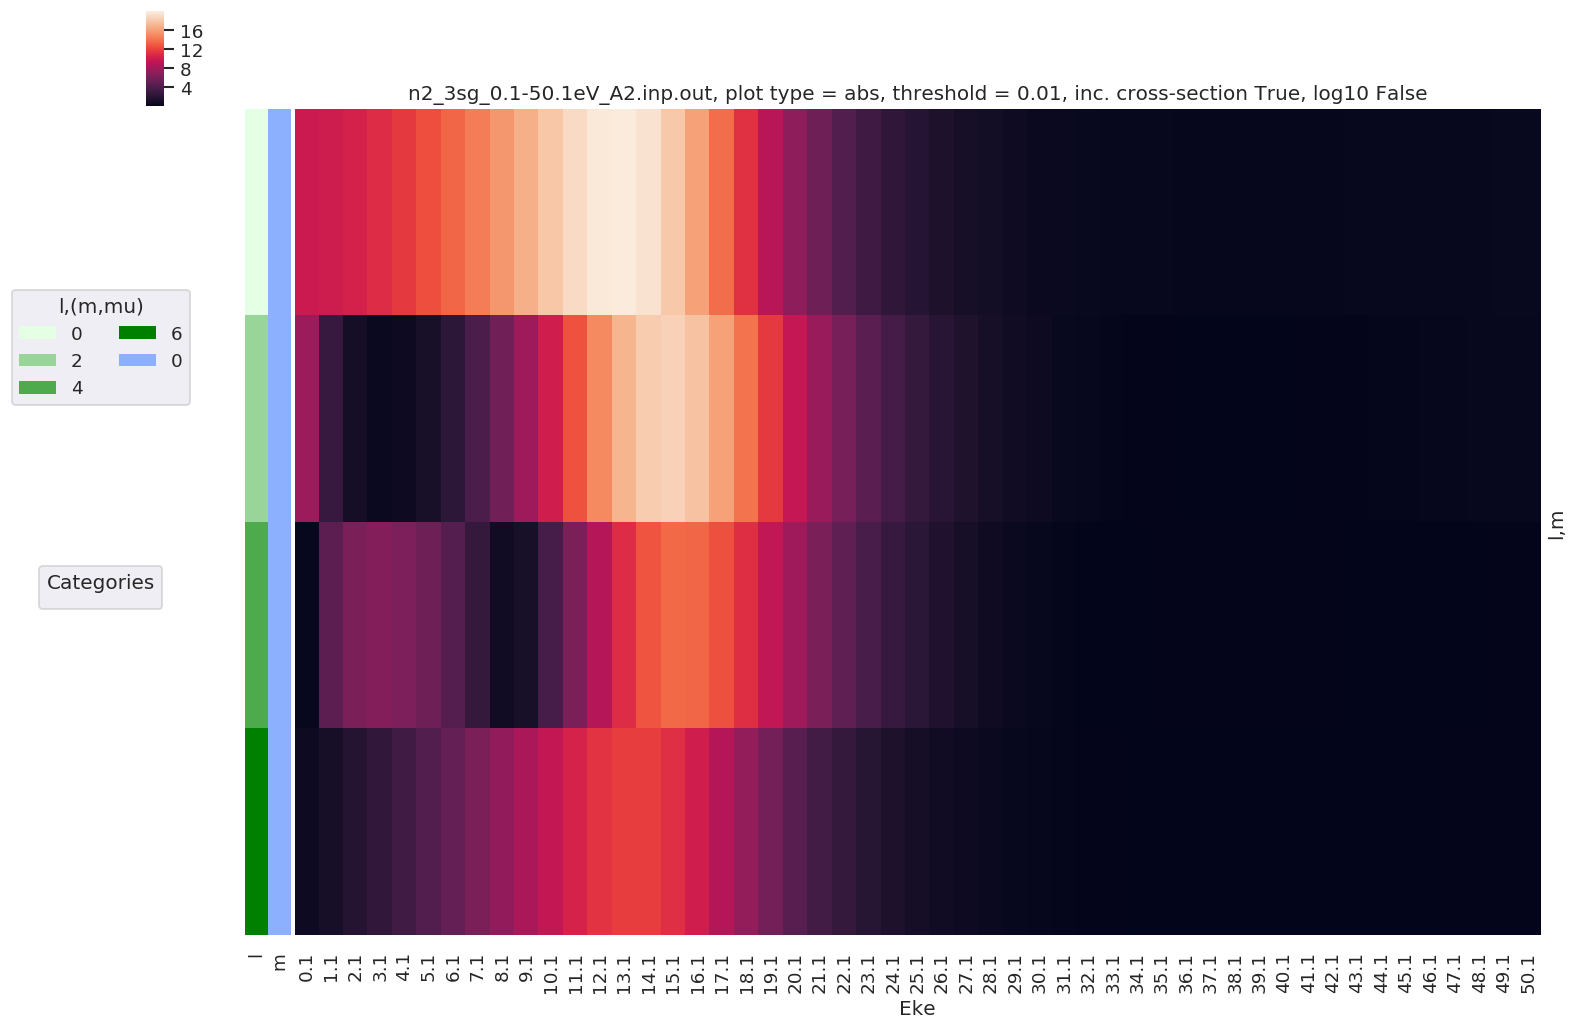

In [29]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(BLMXeN2, SFflag = True,
                                               plotDims = ('l','m'), sumDims = ('Euler'),
                                               figsize = (15,10))

---
- $\beta_{L,M}$ correlations over Eke

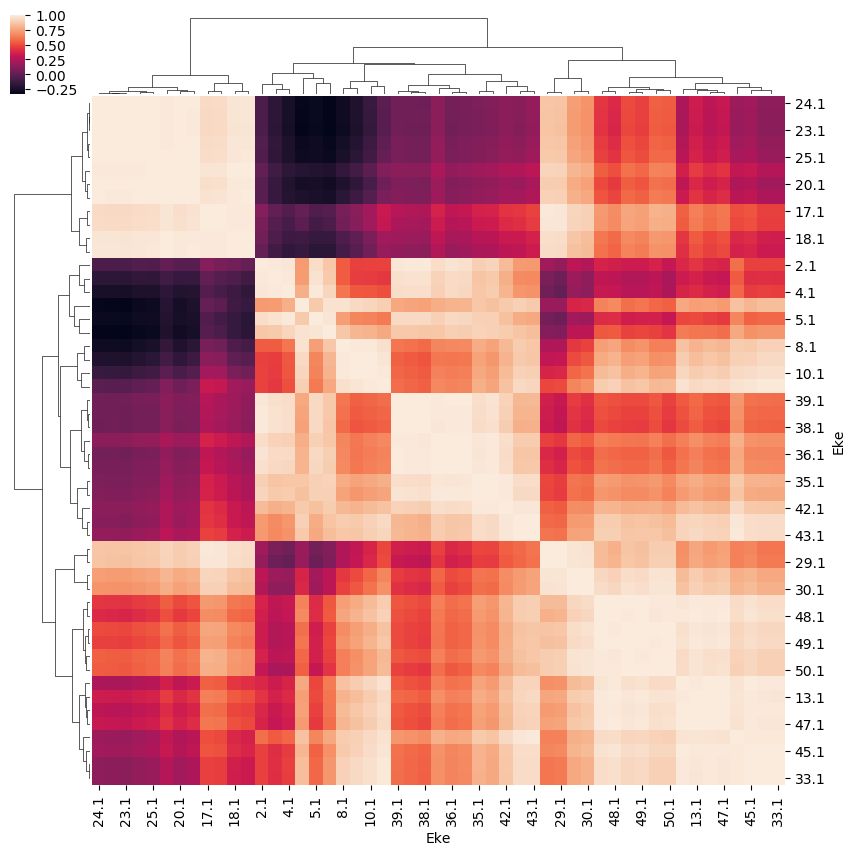

In [30]:
ep.snsMatMod.clustermap(daPlotpd.corr())

---
For the $\beta_{L,M}$ case, the SFflag controls whether normalised or unnormalised values are plotted. In the former case, the cross-section ($\beta_{0,0}$) is divided out, hence $\beta_{0,0}$ = 1.

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.01, with Seaborn


No handles with labels found to put in legend.


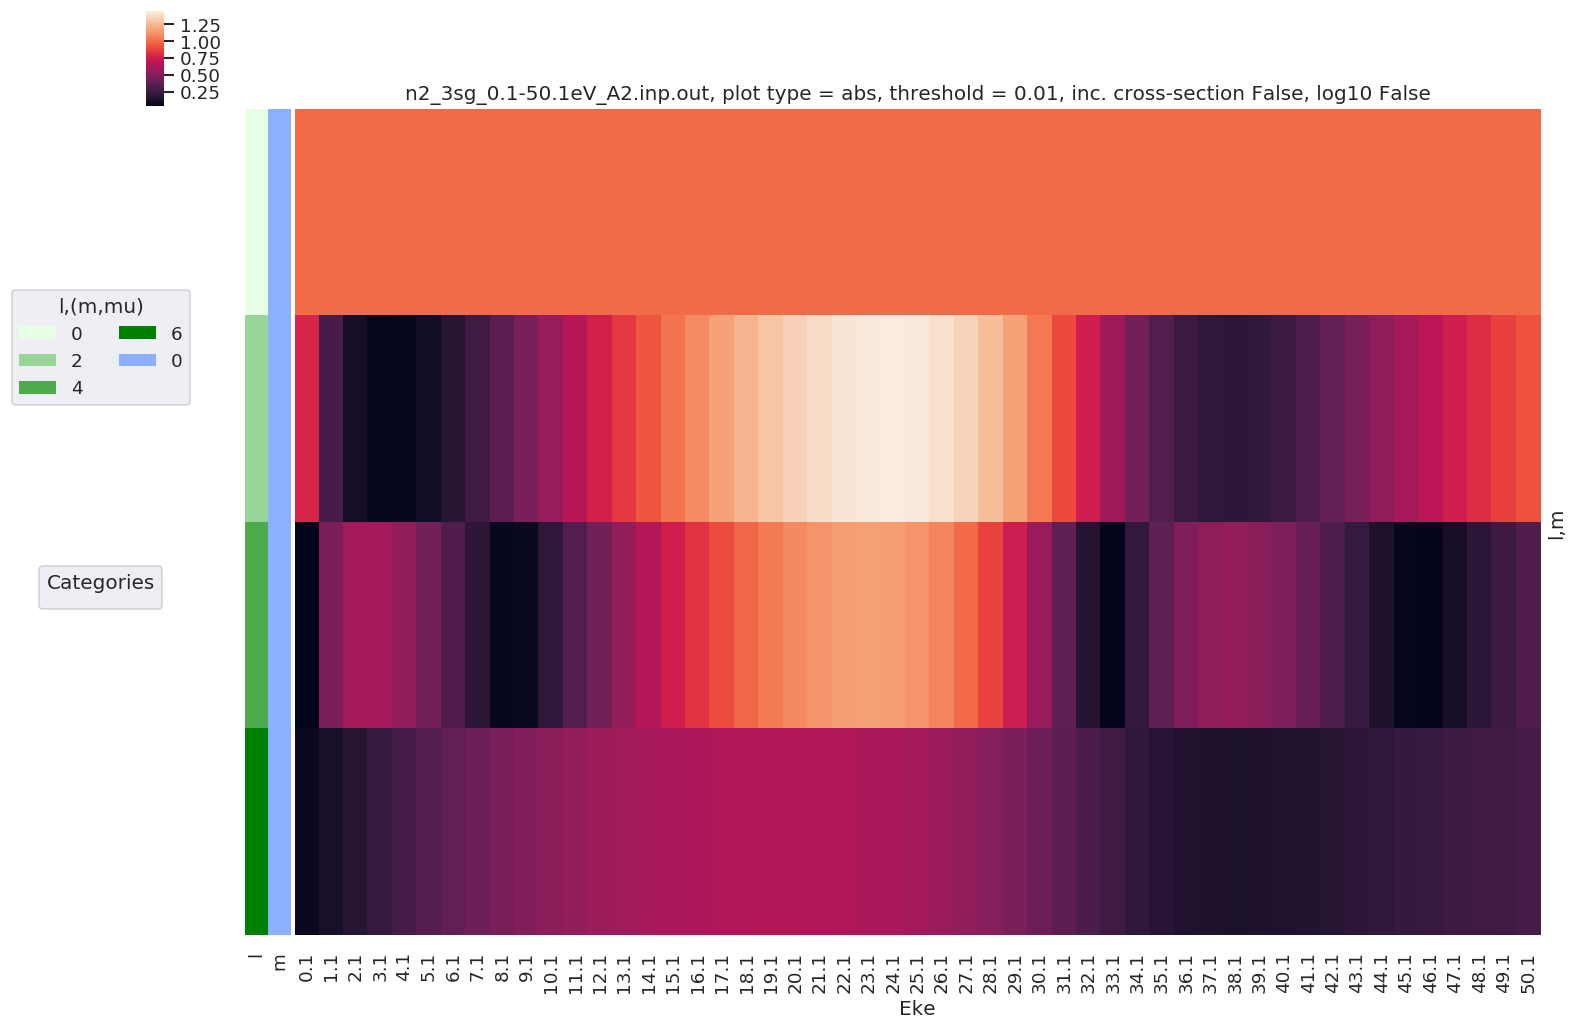

In [31]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(BLMXeN2, SFflag = False,
                                               plotDims = ('l','m'), 
                                               figsize = (15,10))

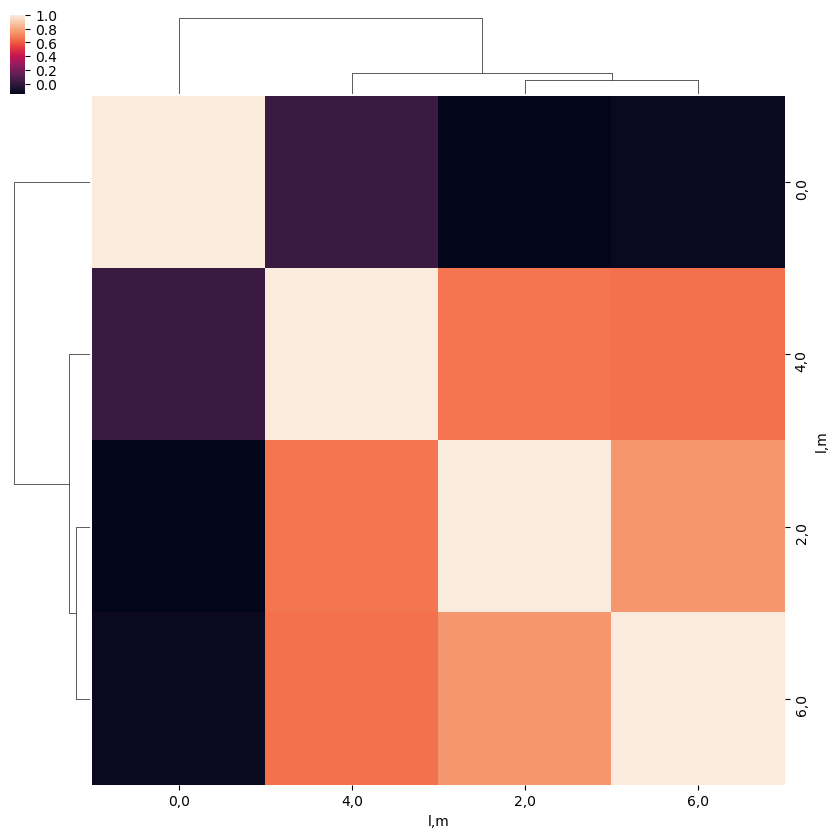

In [32]:
ep.snsMatMod.clustermap(daPlotpd.T.corr())

---
As a function of Euler angle...

In [33]:
# Set pol geoms - these correspond to (z,x,y) in molecular frame (relative to principle/symmetry axis)
# pRot = [0, 0, np.pi/2]
# tRot = [0, np.pi/2, np.pi/2]
# cRot = [0, 0, 0]
# eAngs = np.array([pRot, tRot, cRot]).T   # List form to use later, rows per set of angles

eAngs = ep.setPolGeoms()  # Functionalised form, returns Xarray of pol geoms, defaults to (z,x,y)

In [34]:
thres = 1e-2
# Calculate for each pol geom
# Run for all Eke, selected gauge only; round angles for display purposes only (to be fixed!)
BLMeuler = ep.mfblmEuler(daIn, selDims = {'Type':'L'}, eAngs = eAngs, thres = thres, verbose = 0)
BLMeulerLabel = BLMeuler.drop('Euler').swap_dims({'Euler':'Labels'})  # Swap values and labels for plotting, otherwise will be plotted vs. Euler angles

Cross-sections...

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev\lib\site-packages\xarray\plot\plot.py:76: FutureWarning:

This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.



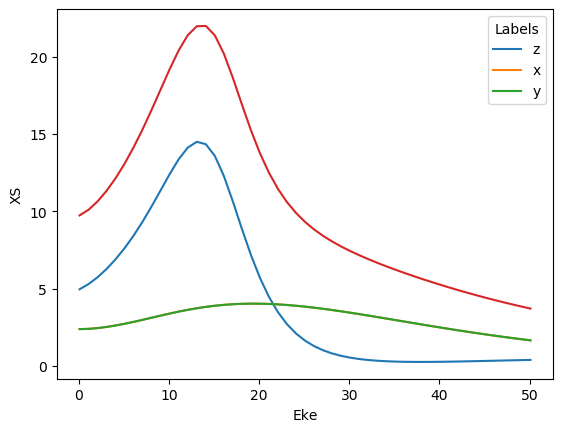

In [35]:
# Check XS values
BLMeulerLabel.XS.real.plot.line(x='Eke');
# BLMeuler.XS.sum('Euler').real.plot.line(x='Eke');  # Add sum over Euler angles sets
BLMeulerLabel.XS.sum('Labels').real.plot.line(x='Eke');  # Add sum over Euler angles sets

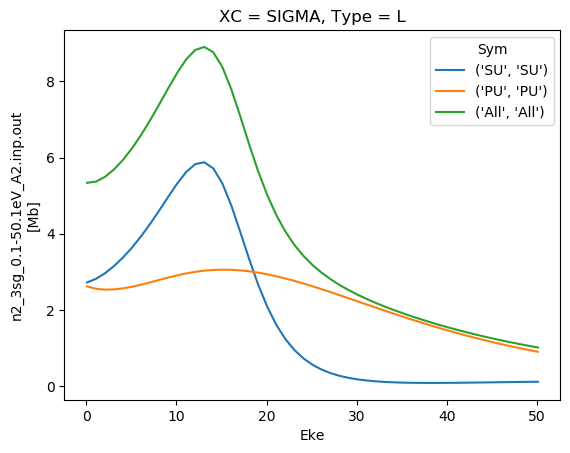

In [36]:
# Check XS from ePS file GetCRO outputs 
# This is for each symmetry group, averaged over all angles (i.e. unaligned LF) - see ePS manaul, https://www.chem.tamu.edu/rgroup/lucchese/ePolyScat.E3.manual/GetCro.html
# Hence should be similar to (x,y,z) MF orientations, but not identical
dataXS[0].sel({'XC':'SIGMA', 'Type':'L'}).plot.line(x='Eke');

$\beta_{L,M}$ parameters...

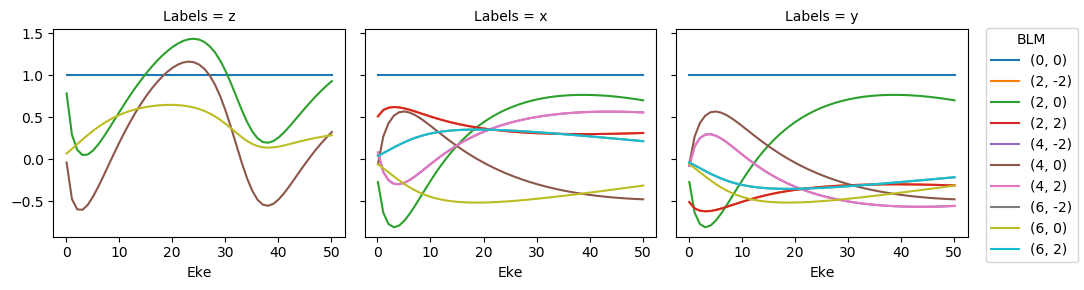

In [37]:
# Plot (normalised) BLM results - basic with Xarray (note Seaborn style may now be applied, since lmPlot() sets this globally)
BLMplot = ep.matEleSelector(BLMeulerLabel, thres=thres, dims = 'Eke')
BLMplot.real.squeeze().plot.line(x='Eke', col='Labels');

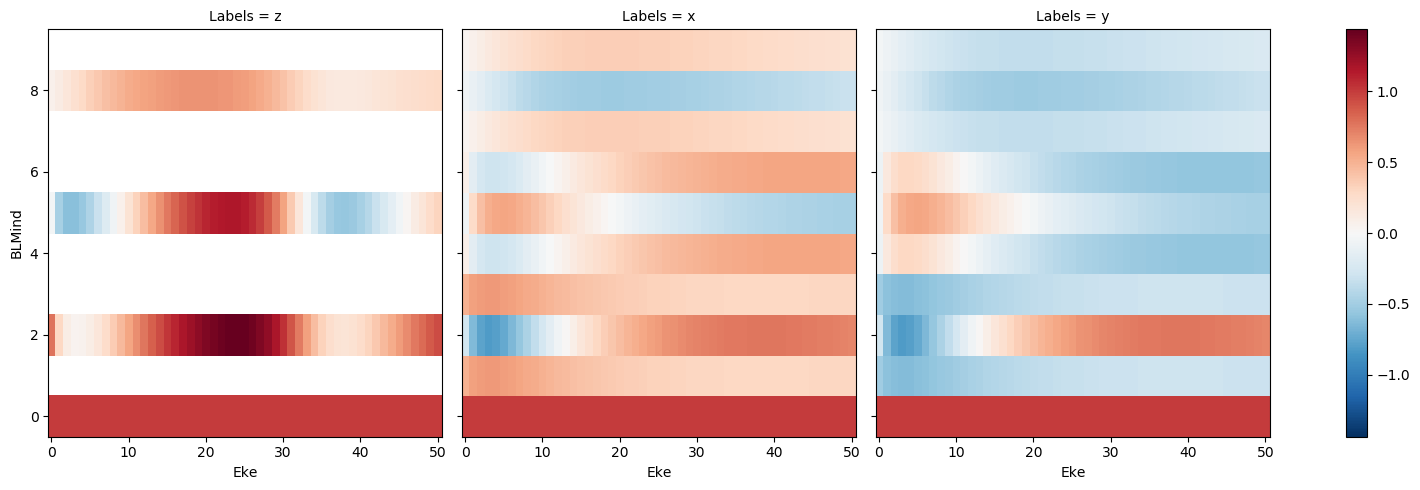

In [38]:
# Plot resutls - 2D maps with Xarray, faceted on Euler angle sets
# Set BLM index for y-axis
BLMplot['BLMind'] = ('BLM',np.arange(0, BLMplot.BLM.size))
# Plot
BLMplot.real.squeeze().plot(x='Eke', y='BLMind', col='Labels', size = 5);

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.01, with Seaborn


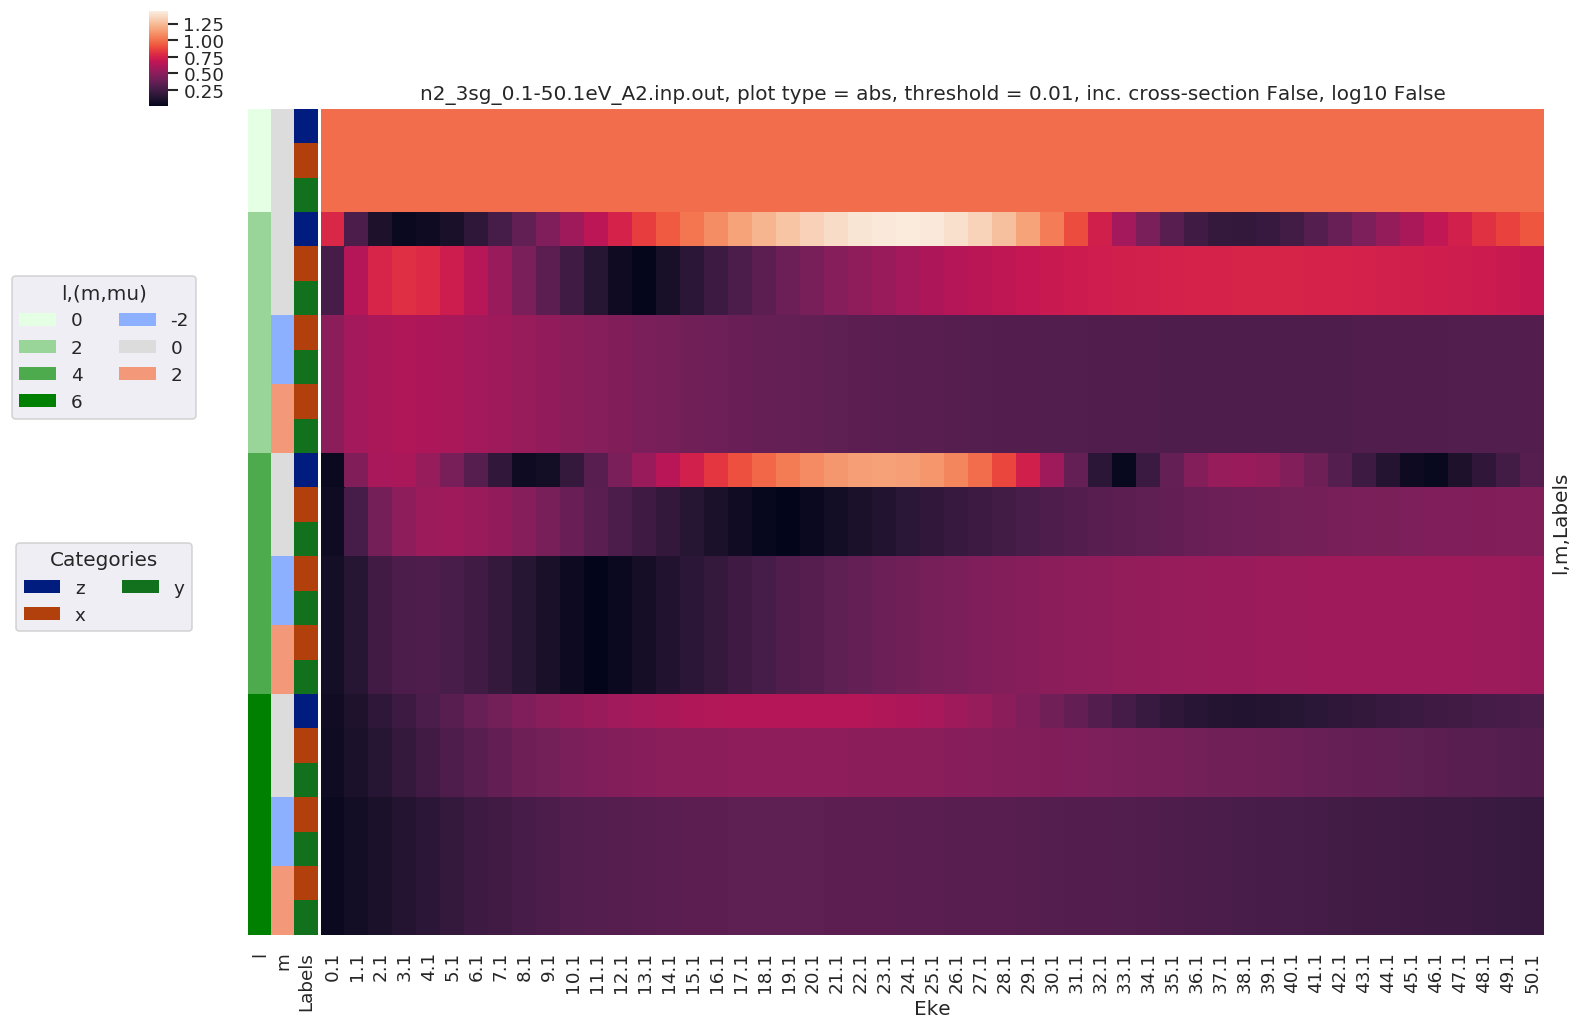

In [39]:
# Plot results with lmPlot()
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(BLMeuler, SFflag = False, eulerGroup = True,
                                               plotDims = ('l','m','Labels'), 
                                               figsize = (15,10))

In [40]:
daPlotpd

Eke              0.1       1.1       2.1       3.1       4.1       5.1   \
l m  Labels                                                               
0  0 z       1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
     x       1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
     y       1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0 z       0.785011  0.293449  0.111540  0.049561  0.056243  0.104724   
     x       0.272486  0.637673  0.773735  0.812507  0.791447  0.732312   
     y       0.272486  0.637673  0.773735  0.812507  0.791447  0.732312   
  -2 x       0.512057  0.586600  0.614373  0.622288  0.617989  0.605918   
     y       0.512057  0.586600  0.614373  0.622288  0.617989  0.605918   
   2 x       0.512057  0.586600  0.614373  0.622288  0.617989  0.605918   
     y       0.512057  0.586600  0.614373  0.622288  0.617989  0.605918   
4  0 z       0.040440  0.474638  0.598502  0.603911  0.543444  0.444731   
     x       0.059137  0.269489  0.430702  0.519099  0.560386  0.569288   
     y       0.059137  0.269489  0.430702  0.519099  0.560386  0.569288   
  -2 x       0.080476  0.152557  0.251643  0.293304  0.298915  0.280822   
     y       0.080476  0.152557  0.251643  0.293304  0.298915  0.280822   
   2 x       0.080476  0.152557  0.251643  0.293304  0.298915  0.280822   
     y       0.080476  0.152557  0.251643  0.293304  0.298915  0.280822   
6  0 z       0.068194  0.122431  0.179261  0.235361  0.289105  0.339558   
     x       0.059156  0.106111  0.155866  0.205371  0.252784  0.296866   
     y       0.059156  0.106111  0.155866  0.205371  0.252784  0.296866   
  -2 x       0.040411  0.072488  0.106477  0.140295  0.172685  0.202798   
     y       0.040411  0.072488  0.106477  0.140295  0.172685  0.202798   
   2 x       0.040411  0.072488  0.106477  0.140295  0.172685  0.202798   
     y       0.040411  0.072488  0.106477  0.140295  0.172685  0.202798   

Eke              6.1       7.1       8.1       9.1   ...      41.1      42.1  \
l m  Labels                                          ...                       
0  0 z       1.000000  1.000000  1.000000  1.000000  ...  1.000000  1.000000   
     x       1.000000  1.000000  1.000000  1.000000  ...  1.000000  1.000000   
     y       1.000000  1.000000  1.000000  1.000000  ...  1.000000  1.000000   
2  0 z       0.178871  0.268287  0.365983  0.467176  ...  0.320748  0.389800   
     x       0.649701  0.553911  0.452233  0.349699  ...  0.764359  0.761156   
     y       0.649701  0.553911  0.452233  0.349699  ...  0.764359  0.761156   
  -2 x       0.589055  0.569502  0.548747  0.527818  ...  0.300411  0.301065   
     y       0.589055  0.569502  0.548747  0.527818  ...  0.300411  0.301065   
   2 x       0.589055  0.569502  0.548747  0.527818  ...  0.300411  0.301065   
     y       0.589055  0.569502  0.548747  0.527818  ...  0.300411  0.301065   
4  0 z       0.324406  0.193160  0.058087  0.076090  ...  0.405478  0.321374   
     x       0.555695  0.526731  0.487676  0.442441  ...  0.434418  0.441791   
     y       0.555695  0.526731  0.487676  0.442441  ...  0.434418  0.441791   
  -2 x       0.247316  0.204290  0.155991  0.105436  ...  0.565731  0.566930   
     y       0.247316  0.204290  0.155991  0.105436  ...  0.565731  0.566930   
   2 x       0.247316  0.204290  0.155991  0.105436  ...  0.565731  0.566930   
     y       0.247316  0.204290  0.155991  0.105436  ...  0.565731  0.566930   
6  0 z       0.386124  0.428443  0.466366  0.499925  ...  0.164395  0.179851   
     x       0.336789  0.372096  0.402658  0.428609  ...  0.389928  0.381806   
     y       0.336789  0.372096  0.402658  0.428609  ...  0.389928  0.381806   
  -2 x       0.230071  0.254190  0.275068  0.292796  ...  0.266372  0.260823   
     y       0.230071  0.254190  0.275068  0.292796  ...  0.266372  0.260823   
   2 x       0.230071  0.254190  0.275068  0.292796  ...  0.266372  0.260823   
     y       0.230071  0.254190  0.275068  0.2927

---
- Look at correlations over all (l,m,Euler)

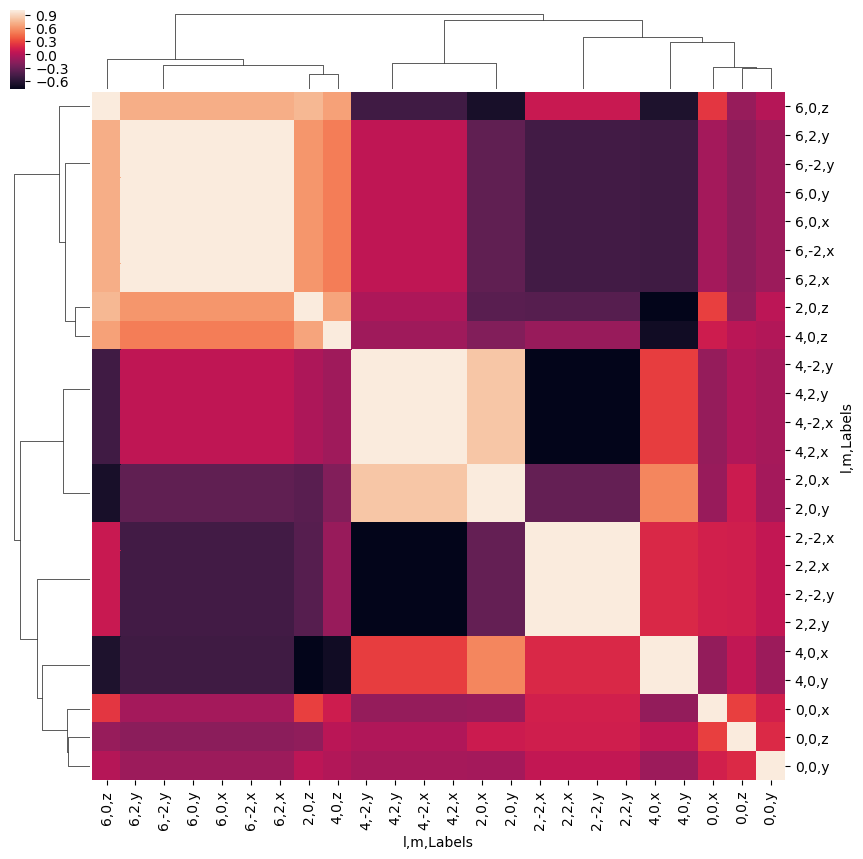

In [41]:
ep.snsMatMod.clustermap(daPlotpd.T.corr())

---
- Replot with sorting by Euler sets

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.01, with Seaborn


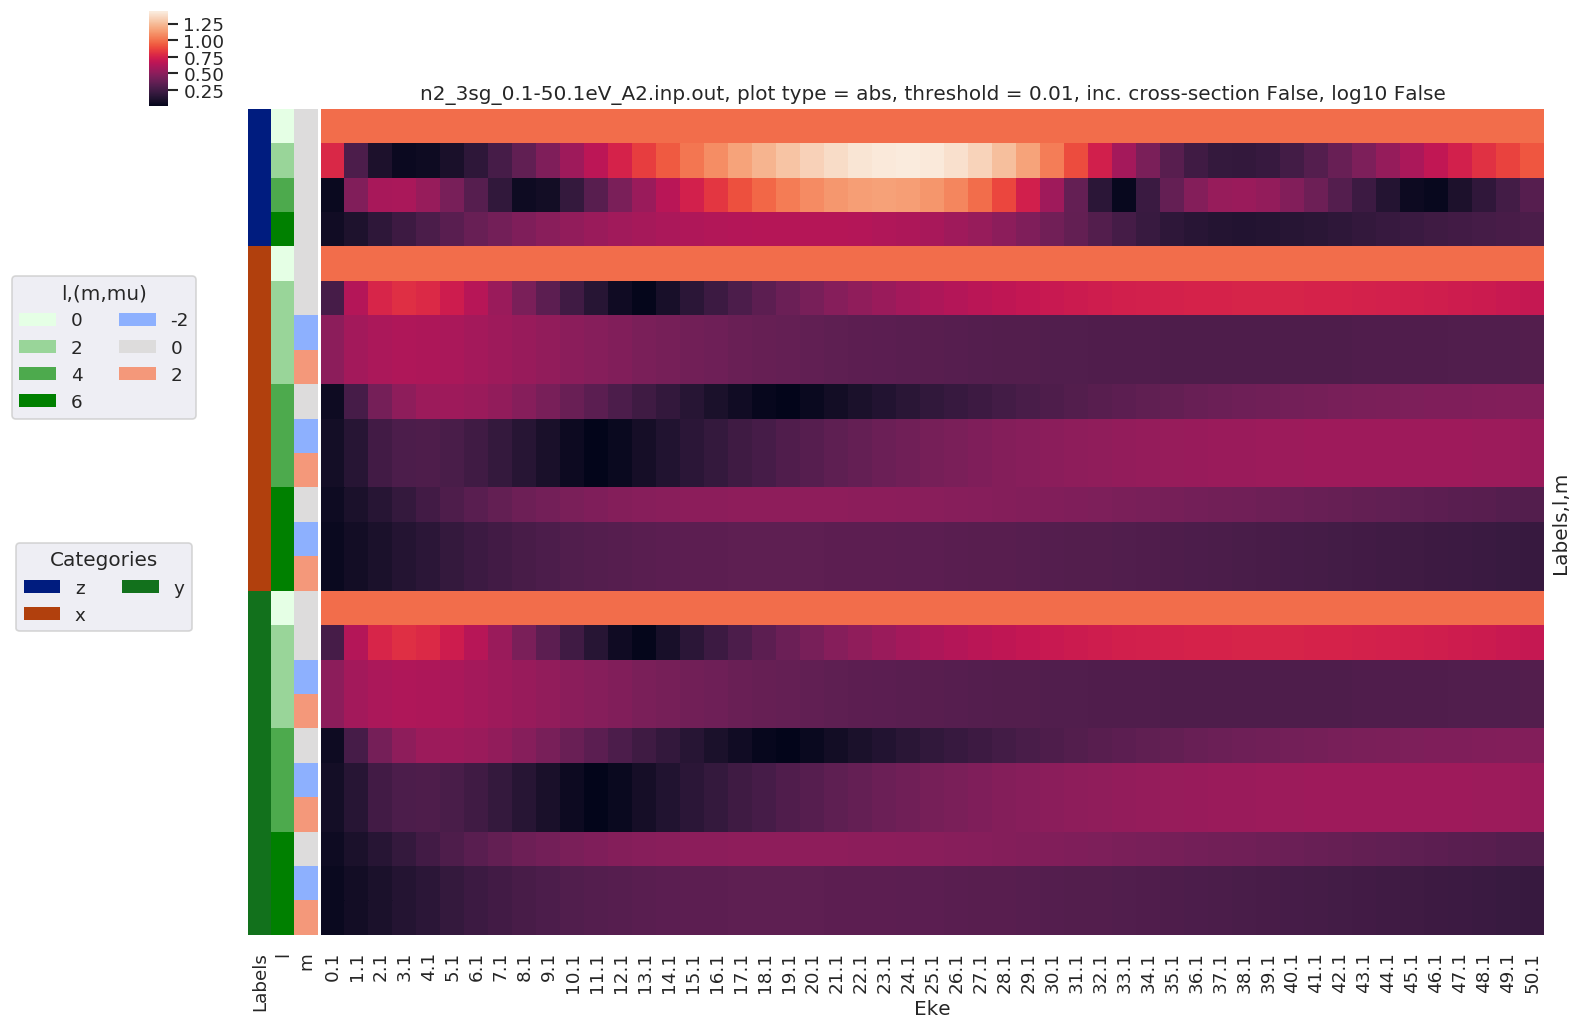

In [42]:
# Plot results with lmPlot(), ordering by Euler sets
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(BLMeuler, SFflag = False, eulerGroup = True,
                                               plotDims = ('Labels','l','m'), 
                                               figsize = (15,10))

... and including cross-section ...

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.01, with Seaborn


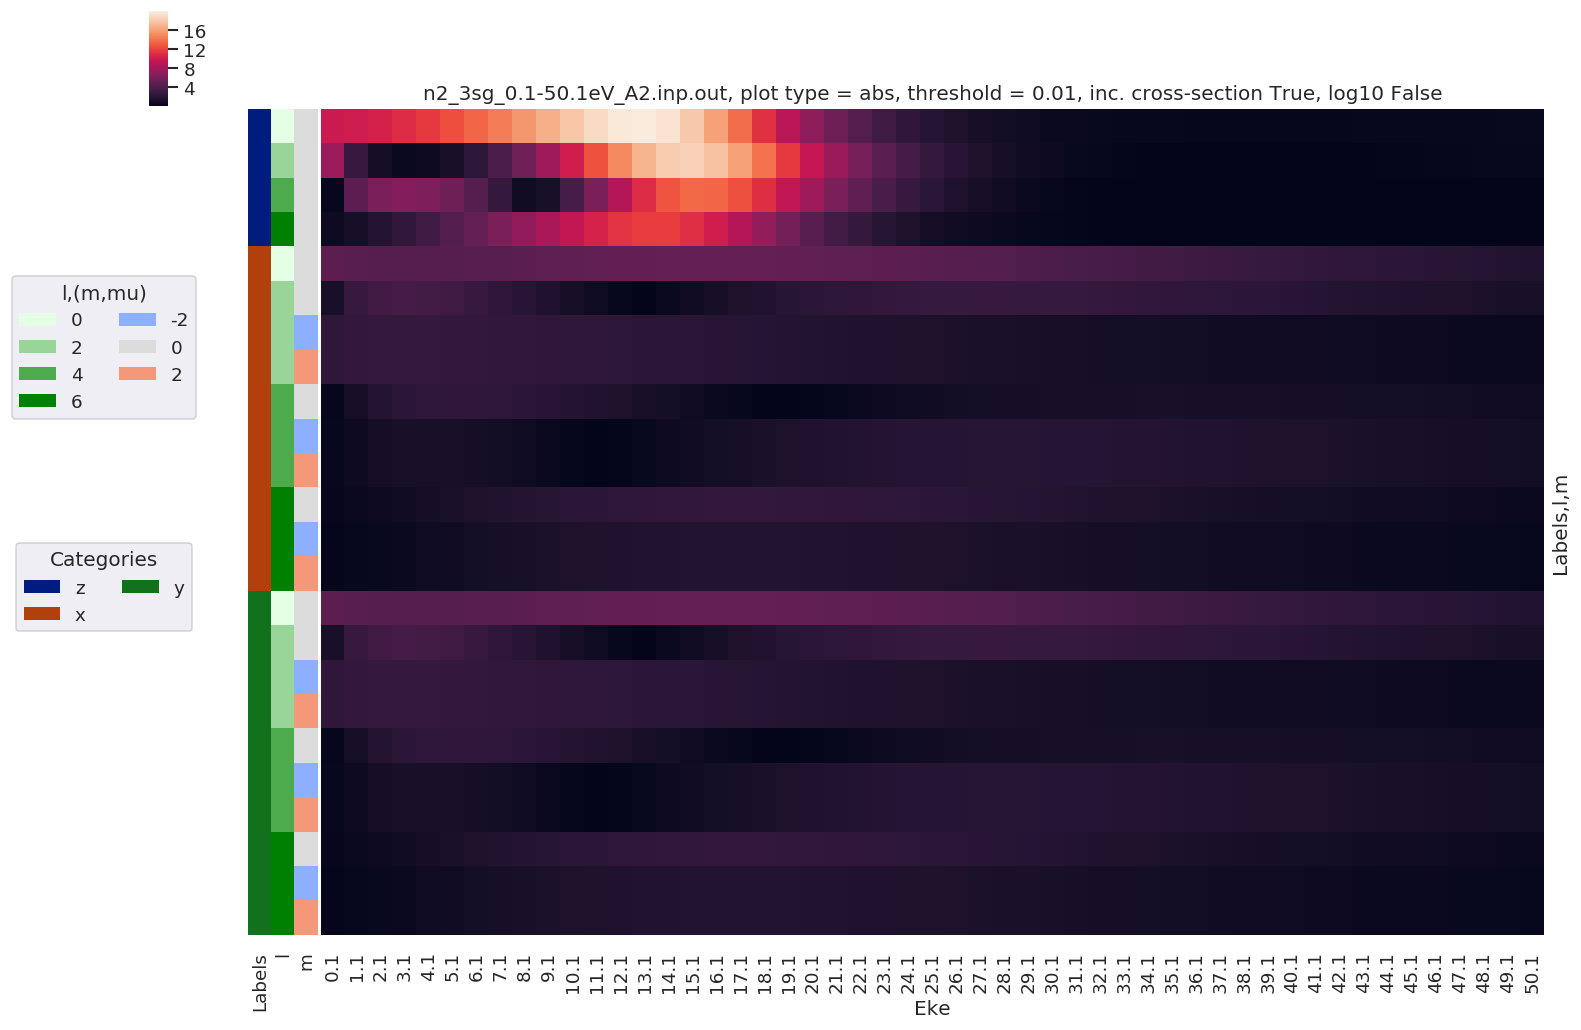

In [43]:
# Plot results with lmPlot(), ordering by Euler sets + use XS
# NOTE - this currently plots with unstacked Euler angles (P,T,C) - should change to treat these as a stacked set.
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(BLMeuler, SFflag = True,
                                               plotDims = ('Labels','l','m'), 
                                               figsize = (15,10))

In [44]:
daPlotpd

Eke              0.1        1.1        2.1        3.1        4.1        5.1   \
Labels l m                                                                     
z      0  0  9.938070  10.137061  10.536345  11.091344  11.782562  12.601551   
       2  0  7.801490   2.974707   1.175228   0.549695   0.662683   1.319691   
       4  0  0.401896   4.811433   6.306021   6.698186   6.403164   5.604304   
       6  0  0.677715   1.241087   1.888756   2.610470   3.406393   4.278957   
x      0  0  4.780633   4.596718   4.500082   4.463496   4.471544   4.513611   
       2  0  1.302658   2.931201   3.481869   3.626621   3.538992   3.305371   
         -2  2.447955   2.696434   2.764731   2.777579   2.763365   2.734878   
          2  2.447955   2.696434   2.764731   2.777579   2.763365   2.734878   
       4  0  0.282713   1.238766   1.938195   2.316998   2.505790   2.569545   
         -2  0.384727   0.701263   1.132412   1.309163   1.336610   1.267522   
          2  0.384727   0.701263   1.132412   1.309163   1.336610   1.267522   
       6  0  0.282804   0.487763   0.701410   0.916675   1.130337   1.339937   
         -2  0.193192   0.333205   0.479155   0.626208   0.772167   0.915352   
          2  0.193192   0.333205   0.479155   0.626208   0.772167   0.915352   
y      0  0  4.780633   4.596718   4.500082   4.463496   4.471544   4.513611   
       2  0  1.302658   2.931201   3.481869   3.626621   3.538992   3.305371   
         -2  2.447955   2.696434   2.764731   2.777579   2.763365   2.734878   
          2  2.447955   2.696434   2.764731   2.777579   2.763365   2.734878   
       4  0  0.282713   1.238766   1.938195   2.316998   2.505790   2.569545   
         -2  0.384727   0.701263   1.132412   1.309163   1.336610   1.267522   
          2  0.384727   0.701263   1.132412   1.309163   1.336610   1.267522   
       6  0  0.282804   0.487763   0.701410   0.916675   1.130337   1.339937   
         -2  0.193192   0.333205   0.479155   0.626208   0.772167   0.915352   
          2  0.193192   0.333205   0.479155   0.626208   0.772167   0.915352   

Eke               6.1        7.1        8.1        9.1   ...      41.1  \
Labels l m                                               ...             
z      0  0  13.542177  14.594115  15.735898  16.925624  ...  0.312529   
       2  0   2.422303   3.915404   5.759074   7.907254  ...  0.100243   
       4  0   4.393168   2.819004   0.914053   1.287878  ...  0.126724   
       6  0   5.228955   6.252740   7.338681   8.461538  ...  0.051378   
x      0  0   4.580735   4.664598   4.757434   4.852244  ...  2.658339   
       2  0   2.976108   2.583773   2.151469   1.696826  ...  2.031927   
         -2   2.698305   2.656499   2.610629   2.561100  ...  0.798595   
          2   2.698305   2.656499   2.610629   2.561100  ...  0.798595   
       4  0   2.545493   2.456989   2.320085   2.146831  ...  1.154830   
         -2   1.132891   0.952932   0.742118   0.511599  ...  1.503904   
          2   1.132891   0.952932   0.742118   0.511599  ...  1.503904   
       6  0   1.542742   1.735677   1.915618   2.079715  ...  1.036562   
         -2   1.053893   1.185693   1.308616   1.420716  ...  0.708106   
          2   1.053893   1.185693   1.308616   1.420716  ...  0.708106   
y      0  0   4.580735   4.664598   4.757434   4.852244  ...  2.658339   
       2  0   2.976108   2.583773   2.151469   1.696826  ...  2.031927   
         -2   2.698305   2.656499   2.610629   2.561100  ...  0.798595   
          2   2.698305   2.656499   2.610629   2.561100  ...  0.798595   
       4  0   2.545493   2.456989   2.320085   2.146831  ...  1.154830   
         -2   1.132891   0.952932   0.742118   0.511599  ...  1.503904   
          2   1.132891   0.952932   0.742118   0.511599  ...  1.503904   
       6  0   1.542742   1.735677   1.915618   2.079715  ...  1.036562   
         -2   1.053893   1.185693   1.308616   1.420716  ...  0.708106   
          2   1.053893   1.185693   1.308616   1.420716  ...  0.70810

## Version info

In [45]:
%load_ext version_information

In [46]:
%version_information epsproc, xarray

Software versions
Python 3.7.3 64bit [MSC v.1915 64 bit (AMD64)]
IPython 7.7.0
OS Windows 10 10.0.17763 SP0
epsproc 1.2.4
xarray 0.12.3
Fri Feb 07 12:13:28 2020 Eastern Standard Time